# 基于物理公式进行特征选择的关于e_ionic的分组模型 

[TOC]

In [27]:
# 导库
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import KFold, cross_val_score, cross_val_predict
from sklearn.linear_model import LinearRegression

In [28]:
# 一些参数
TEST_SIZE = 0.30
RANDOM_STATE = 42
N_SPLITS = 10
# 决策树的深度
BEST_DEPTH_0 = None
BEST_DEPTH_4 = None

In [29]:
# 导入数据
data = pd.read_csv('../../data/groups/clusters_ionic/data_cluster.csv')
data.head()

,space_group,band_gap,density,density_atomic,formation_energy_per_atom,e_total,e_ionic,e_electronic,MagpieData minimum Number,MagpieData maximum Number,...,MagpieData minimum CovalentRadius,MagpieData maximum CovalentRadius,MagpieData range CovalentRadius,MagpieData mean CovalentRadius,MagpieData minimum Electronegativity,MagpieData maximum Electronegativity,MagpieData range Electronegativity,MagpieData mean Electronegativity,cluster,class
0,164,3.8971,3.810445,42.690617,-1.928175,5.369542,2.132453,3.237090,20.0,53.0,...,139.0,176.0,37.0,151.333333,1.00,2.66,1.66,2.106667,6,train
1,122,2.0955,4.947128,23.865003,-2.385492,20.952346,13.461579,7.490766,16.0,59.0,...,105.0,203.0,98.0,145.857143,0.95,2.58,1.63,1.932857,6,train
2,225,3.0173,6.892776,14.371590,-3.590597,46.967161,42.005900,4.961261,8.0,73.0,...,66.0,215.0,149.0,116.600000,0.89,3.44,2.55,2.528000,7,train
3,225,1.4541,3.880169,32.606816,-1.744127,9.885204,6.939711,2.945493,17.0,82.0,...,102.0,244.0,142.0,138.444444,0.79,3.16,2.37,2.541111,7,train
4,15,2.5261,4.426263,10.875263,-2.371639,8.808742,5.420374,3.388368,8.0,32.0,...,66.0,141.0,75.0,91.800000,1.31,3.44,2.13,2.728000,3,train


In [30]:
X_train = data[data['class'] == 'train']
X_test = data[data['class'] == 'test']
display(X_train.head())
display(X_test.head())
print(X_train.shape)
print(X_test.shape)

,space_group,band_gap,density,density_atomic,formation_energy_per_atom,e_total,e_ionic,e_electronic,MagpieData minimum Number,MagpieData maximum Number,...,MagpieData minimum CovalentRadius,MagpieData maximum CovalentRadius,MagpieData range CovalentRadius,MagpieData mean CovalentRadius,MagpieData minimum Electronegativity,MagpieData maximum Electronegativity,MagpieData range Electronegativity,MagpieData mean Electronegativity,cluster,class
0,164,3.8971,3.810445,42.690617,-1.928175,5.369542,2.132453,3.237090,20.0,53.0,...,139.0,176.0,37.0,151.333333,1.00,2.66,1.66,2.106667,6,train
1,122,2.0955,4.947128,23.865003,-2.385492,20.952346,13.461579,7.490766,16.0,59.0,...,105.0,203.0,98.0,145.857143,0.95,2.58,1.63,1.932857,6,train
2,225,3.0173,6.892776,14.371590,-3.590597,46.967161,42.005900,4.961261,8.0,73.0,...,66.0,215.0,149.0,116.600000,0.89,3.44,2.55,2.528000,7,train
3,225,1.4541,3.880169,32.606816,-1.744127,9.885204,6.939711,2.945493,17.0,82.0,...,102.0,244.0,142.0,138.444444,0.79,3.16,2.37,2.541111,7,train
4,15,2.5261,4.426263,10.875263,-2.371639,8.808742,5.420374,3.388368,8.0,32.0,...,66.0,141.0,75.0,91.800000,1.31,3.44,2.13,2.728000,3,train


,space_group,band_gap,density,density_atomic,formation_energy_per_atom,e_total,e_ionic,e_electronic,MagpieData minimum Number,MagpieData maximum Number,...,MagpieData minimum CovalentRadius,MagpieData maximum CovalentRadius,MagpieData range CovalentRadius,MagpieData mean CovalentRadius,MagpieData minimum Electronegativity,MagpieData maximum Electronegativity,MagpieData range Electronegativity,MagpieData mean Electronegativity,cluster,class
5093,160,0.7921,4.086507,10.994694,-2.019264,14.078999,6.862966,7.216033,3.0,25.0,...,66.0,139.0,73.0,93.230769,0.98,3.44,2.46,2.677692,9,test
5094,186,1.9661,5.059669,22.397666,-2.460065,23.198326,15.958896,7.239430,8.0,57.0,...,66.0,207.0,141.0,138.583333,1.10,3.44,2.34,2.072500,7,test
5095,14,0.8712,6.411909,23.332010,-1.547133,21.690907,11.098378,10.592529,29.0,57.0,...,120.0,207.0,87.0,144.750000,1.10,2.55,1.45,2.025000,8,test
5096,127,1.2992,2.349037,12.536103,-0.274379,37.388675,30.495613,6.893062,1.0,20.0,...,31.0,176.0,145.0,105.571429,0.98,2.55,1.57,1.832857,7,test
5097,5,1.6206,4.385036,25.392872,-0.587003,11.310439,3.828769,7.481670,13.0,47.0,...,107.0,145.0,38.0,120.000000,1.61,2.55,0.94,2.322000,3,test


(5093, 22)
(2184, 22)


In [31]:
# 移除不需要的列
X_train = X_train.drop(['class'], axis=1)
X_test = X_test.drop(['class'], axis=1)
display(X_train.head())
display(X_test.head())

,space_group,band_gap,density,density_atomic,formation_energy_per_atom,e_total,e_ionic,e_electronic,MagpieData minimum Number,MagpieData maximum Number,...,MagpieData mean Number,MagpieData minimum CovalentRadius,MagpieData maximum CovalentRadius,MagpieData range CovalentRadius,MagpieData mean CovalentRadius,MagpieData minimum Electronegativity,MagpieData maximum Electronegativity,MagpieData range Electronegativity,MagpieData mean Electronegativity,cluster
0,164,3.8971,3.810445,42.690617,-1.928175,5.369542,2.132453,3.237090,20.0,53.0,...,42.000000,139.0,176.0,37.0,151.333333,1.00,2.66,1.66,2.106667,6
1,122,2.0955,4.947128,23.865003,-2.385492,20.952346,13.461579,7.490766,16.0,59.0,...,31.428571,105.0,203.0,98.0,145.857143,0.95,2.58,1.63,1.932857,6
2,225,3.0173,6.892776,14.371590,-3.590597,46.967161,42.005900,4.961261,8.0,73.0,...,25.400000,66.0,215.0,149.0,116.600000,0.89,3.44,2.55,2.528000,7
3,225,1.4541,3.880169,32.606816,-1.744127,9.885204,6.939711,2.945493,17.0,82.0,...,32.666667,102.0,244.0,142.0,138.444444,0.79,3.16,2.37,2.541111,7
4,15,2.5261,4.426263,10.875263,-2.371639,8.808742,5.420374,3.388368,8.0,32.0,...,13.600000,66.0,141.0,75.0,91.800000,1.31,3.44,2.13,2.728000,3


,space_group,band_gap,density,density_atomic,formation_energy_per_atom,e_total,e_ionic,e_electronic,MagpieData minimum Number,MagpieData maximum Number,...,MagpieData mean Number,MagpieData minimum CovalentRadius,MagpieData maximum CovalentRadius,MagpieData range CovalentRadius,MagpieData mean CovalentRadius,MagpieData minimum Electronegativity,MagpieData maximum Electronegativity,MagpieData range Electronegativity,MagpieData mean Electronegativity,cluster
5093,160,0.7921,4.086507,10.994694,-2.019264,14.078999,6.862966,7.216033,3.0,25.0,...,12.769231,66.0,139.0,73.0,93.230769,0.98,3.44,2.46,2.677692,9
5094,186,1.9661,5.059669,22.397666,-2.460065,23.198326,15.958896,7.239430,8.0,57.0,...,29.750000,66.0,207.0,141.0,138.583333,1.10,3.44,2.34,2.072500,7
5095,14,0.8712,6.411909,23.332010,-1.547133,21.690907,11.098378,10.592529,29.0,57.0,...,38.500000,120.0,207.0,87.0,144.750000,1.10,2.55,1.45,2.025000,8
5096,127,1.2992,2.349037,12.536103,-0.274379,37.388675,30.495613,6.893062,1.0,20.0,...,8.857143,31.0,176.0,145.0,105.571429,0.98,2.55,1.57,1.832857,7
5097,5,1.6206,4.385036,25.392872,-0.587003,11.310439,3.828769,7.481670,13.0,47.0,...,29.400000,107.0,145.0,38.0,120.000000,1.61,2.55,0.94,2.322000,3


## 进行特征缩放，归一化

In [32]:
def get_X_y(data_group):
    X = data_group.drop(columns=['e_total', 'e_ionic', 'e_electronic'])
    y = data_group['e_ionic']
    return X, y

In [33]:
def scale(X):
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)
    # X_scaled用于后面模型测试
    return scaler, X_scaled

## 进行模型训练

In [34]:
def model_cross_train(model, X, y):
    '''在X上训练模型model，返回交叉验证的结果：
        1. scores（neg_root_mean_squared_error）
        2. y_hat'''
    # 进行k折交叉验证
    # cross_val_predict()函数不会改变原始的模型。这个函数的主要目的是使用交叉验证来为每个输入数据点生成预测值。
    kfold = KFold(n_splits=N_SPLITS, shuffle=True, random_state=RANDOM_STATE)
    scores = cross_val_score(model, X, y, scoring='neg_root_mean_squared_error', cv=kfold)
    y_hat = cross_val_predict(model, X, y, cv=kfold)
    return scores, y_hat

In [35]:
# 确定好全部超参数后，使用最优的超参数在整个训练集上训练模型
def model_final_train(model, X_train, y_train):
    '''在整个训练集上训练模型model，返回训练好的模型'''
    model.fit(X_train, y_train)
    return model

def model_eval(model, X_test, y_test):
    '''在测试集上测试模型model，返回测试结果：
        1. mean_squared_error
        2. mean_absolute_error
        3. y_pred'''
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    return mse, mae, y_pred

In [36]:
def plot_cross_val_scores(mse, mae, y_hat, y_train):
    '''绘制交叉验证的结果'''
    print(f'MSE: {mse}, MAE: {mae}')

    # 绘制parity plot
    fig, ax = plt.subplots(dpi=300)
    ax.scatter(y_train, y_hat, s=1)
    ax.plot(y_train, y_train, c='k', zorder=-5)
    ax.set_xlabel('Actual $\epsilon_{ionic}$')
    ax.set_ylabel('Predicted $\epsilon_{ionic}$')
    # ax.set_xscale('log')
    # ax.set_yscale('log')
    ax.set_xlim(0, 50)
    ax.set_ylim(0, 50)
    plt.show()


#### 1. LinearRegression模型 

In [37]:
def linear_regression(X_train, y_train):
    # 模型训练
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    # 模型训练集测试
    mse, mae, y_pred = model_eval(lr, X_train, y_train)
    # 绘制结果
    plot_cross_val_scores(mse, mae, y_pred, y_train)
    return lr
# 这里没有使用交叉验证


MSE: 116.58172565157376, MAE: 6.030465270288384


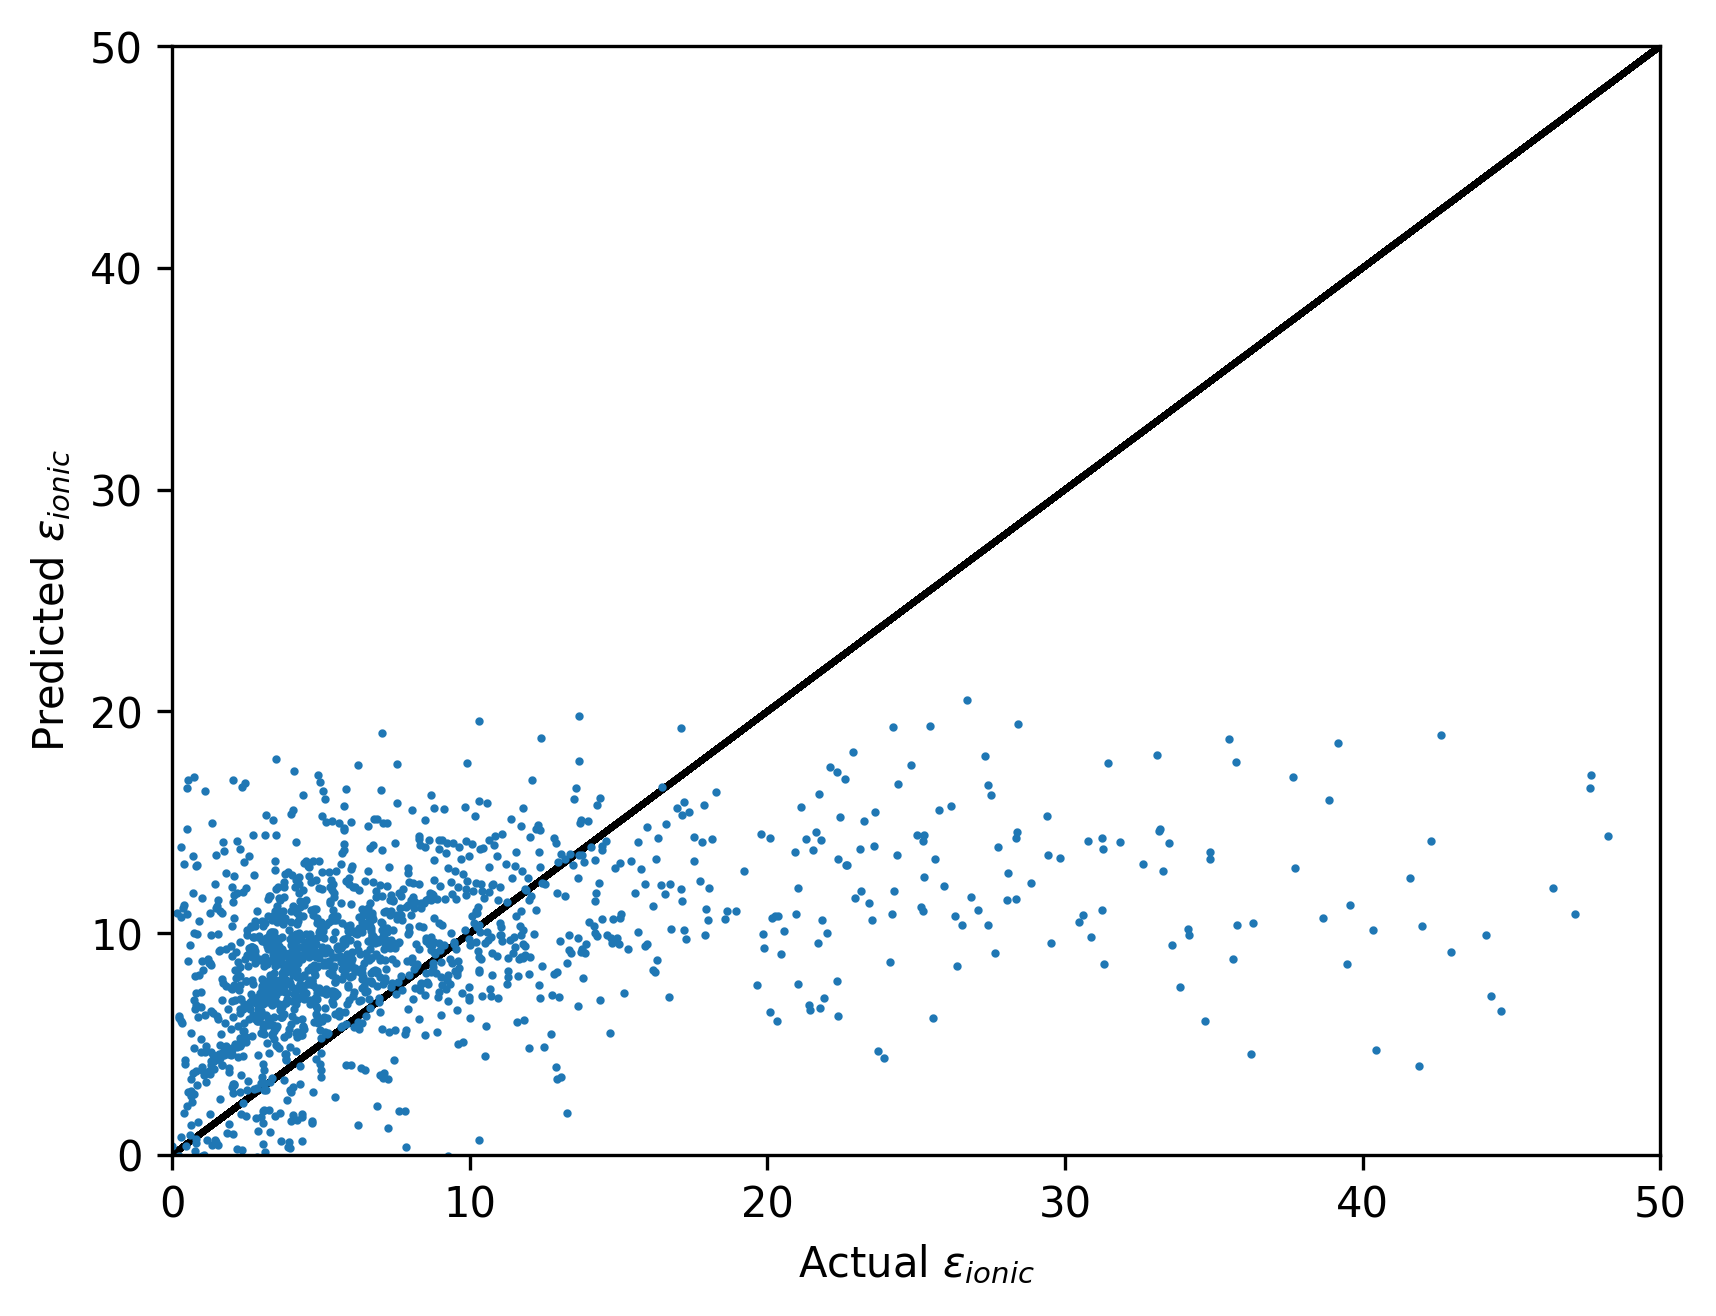

MSE: 97.30129655560806, MAE: 5.856045813619569


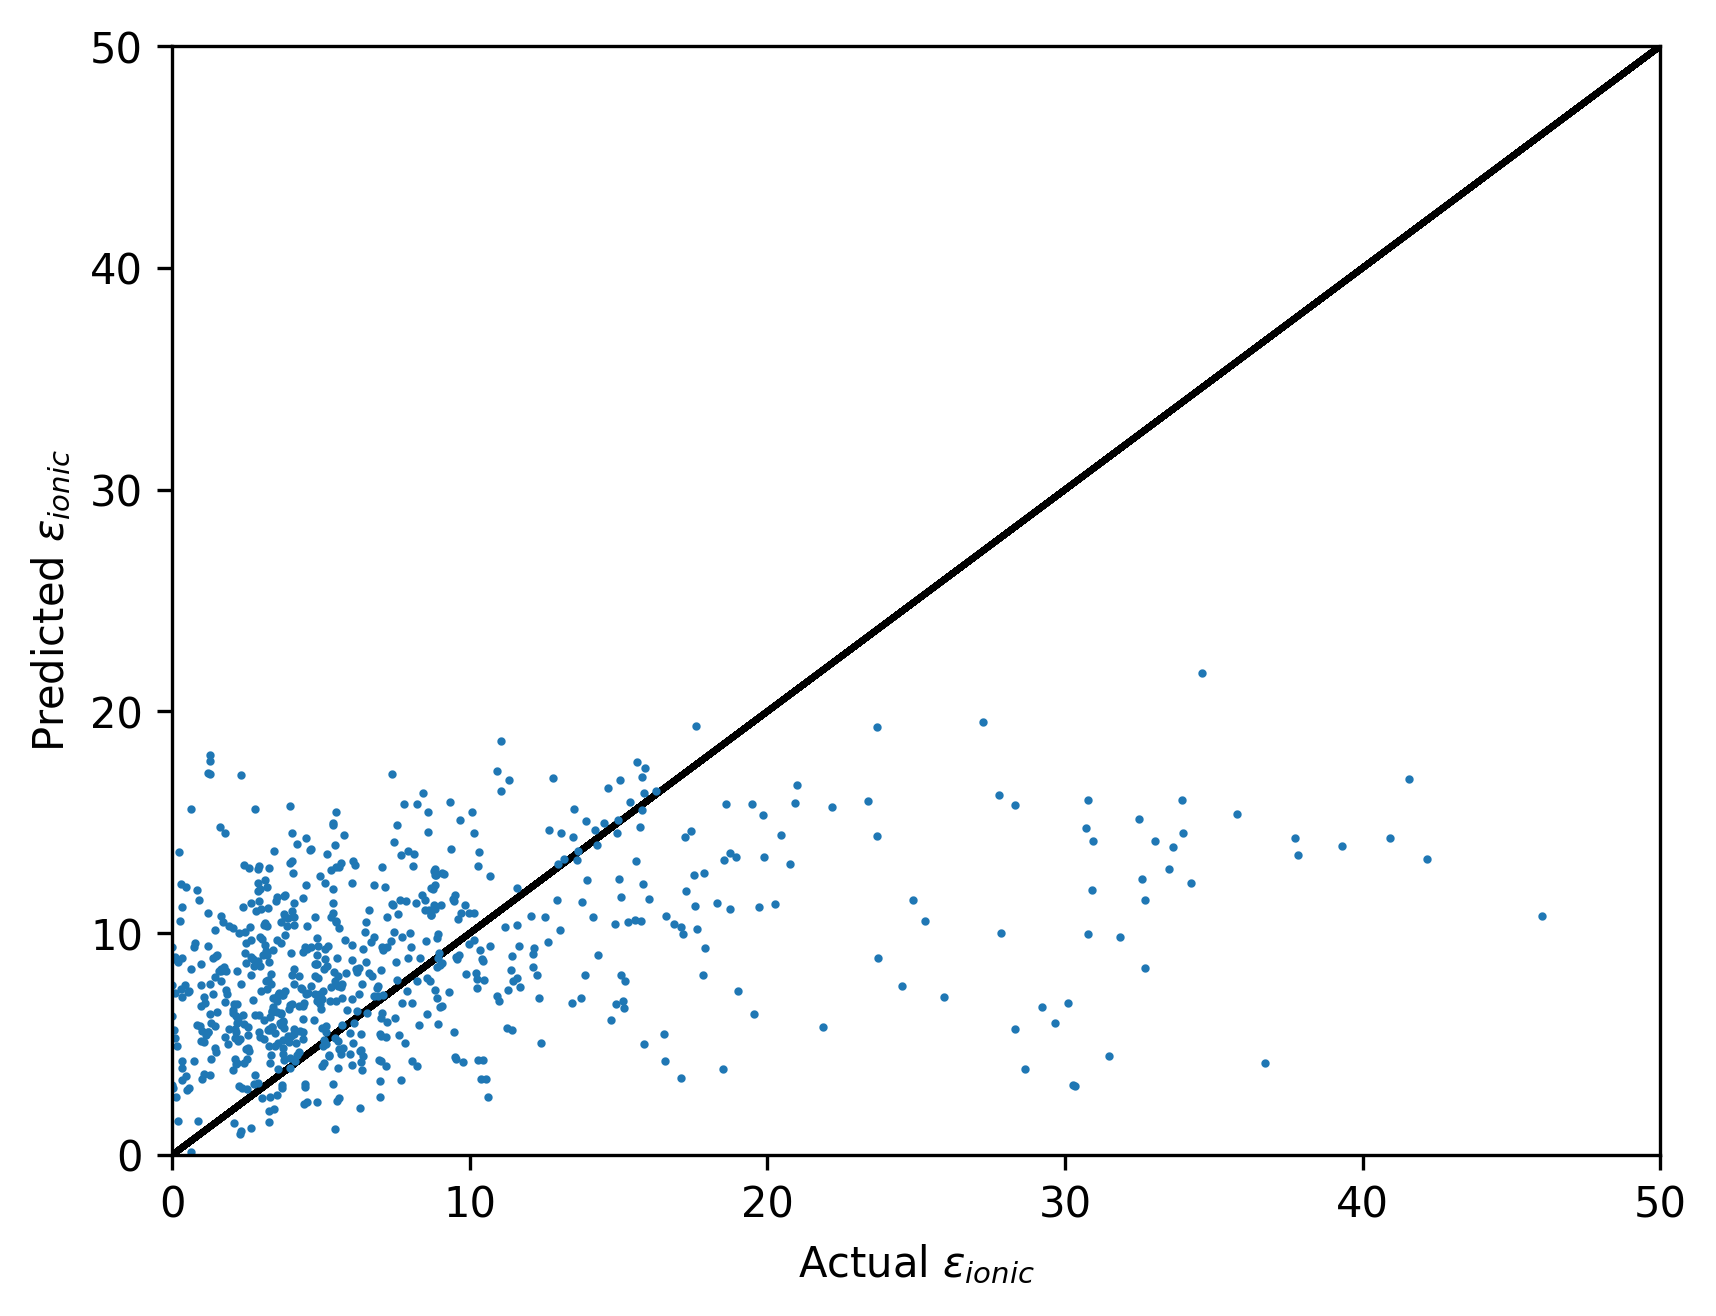

MSE: 112.04748880632654, MAE: 6.226755830681511


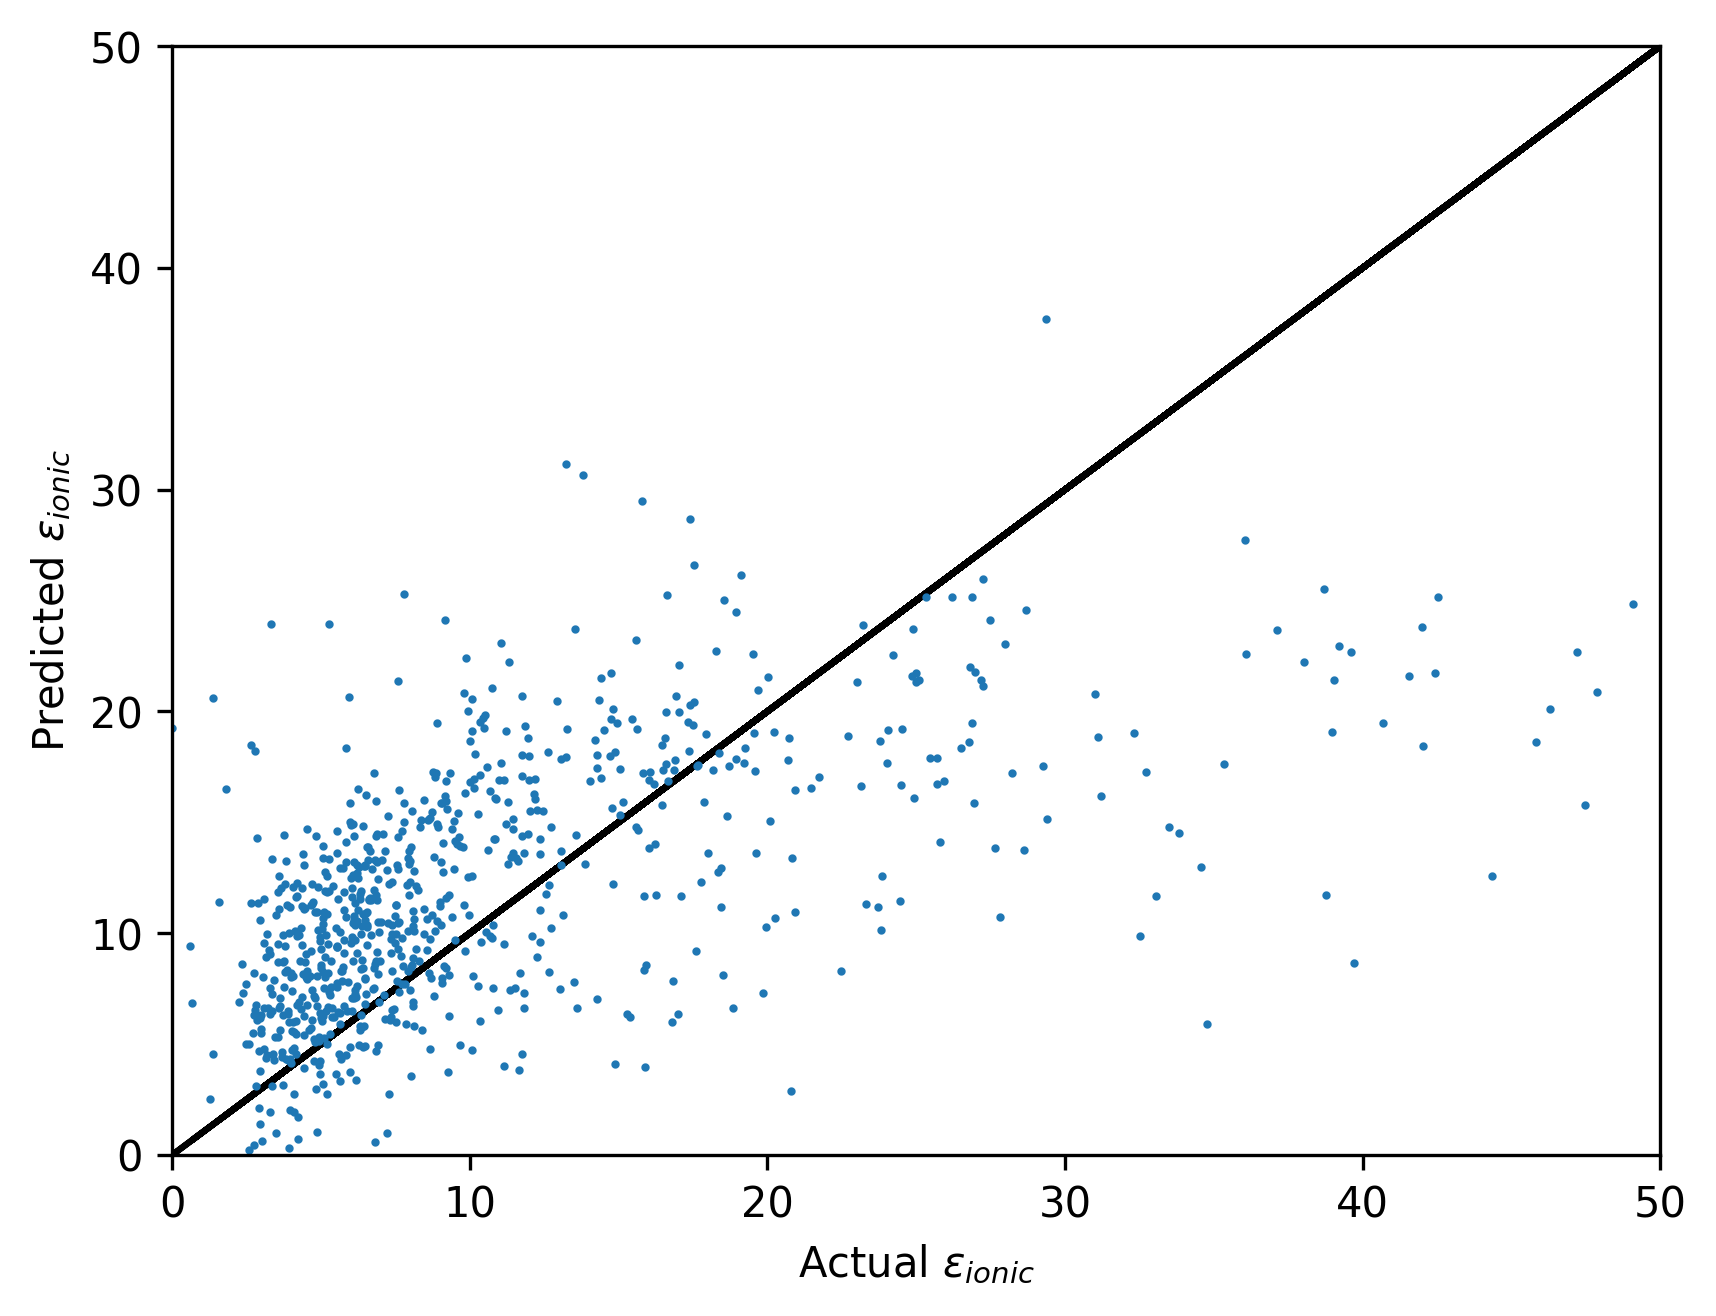

MSE: 118.83240581443228, MAE: 5.741050965440856


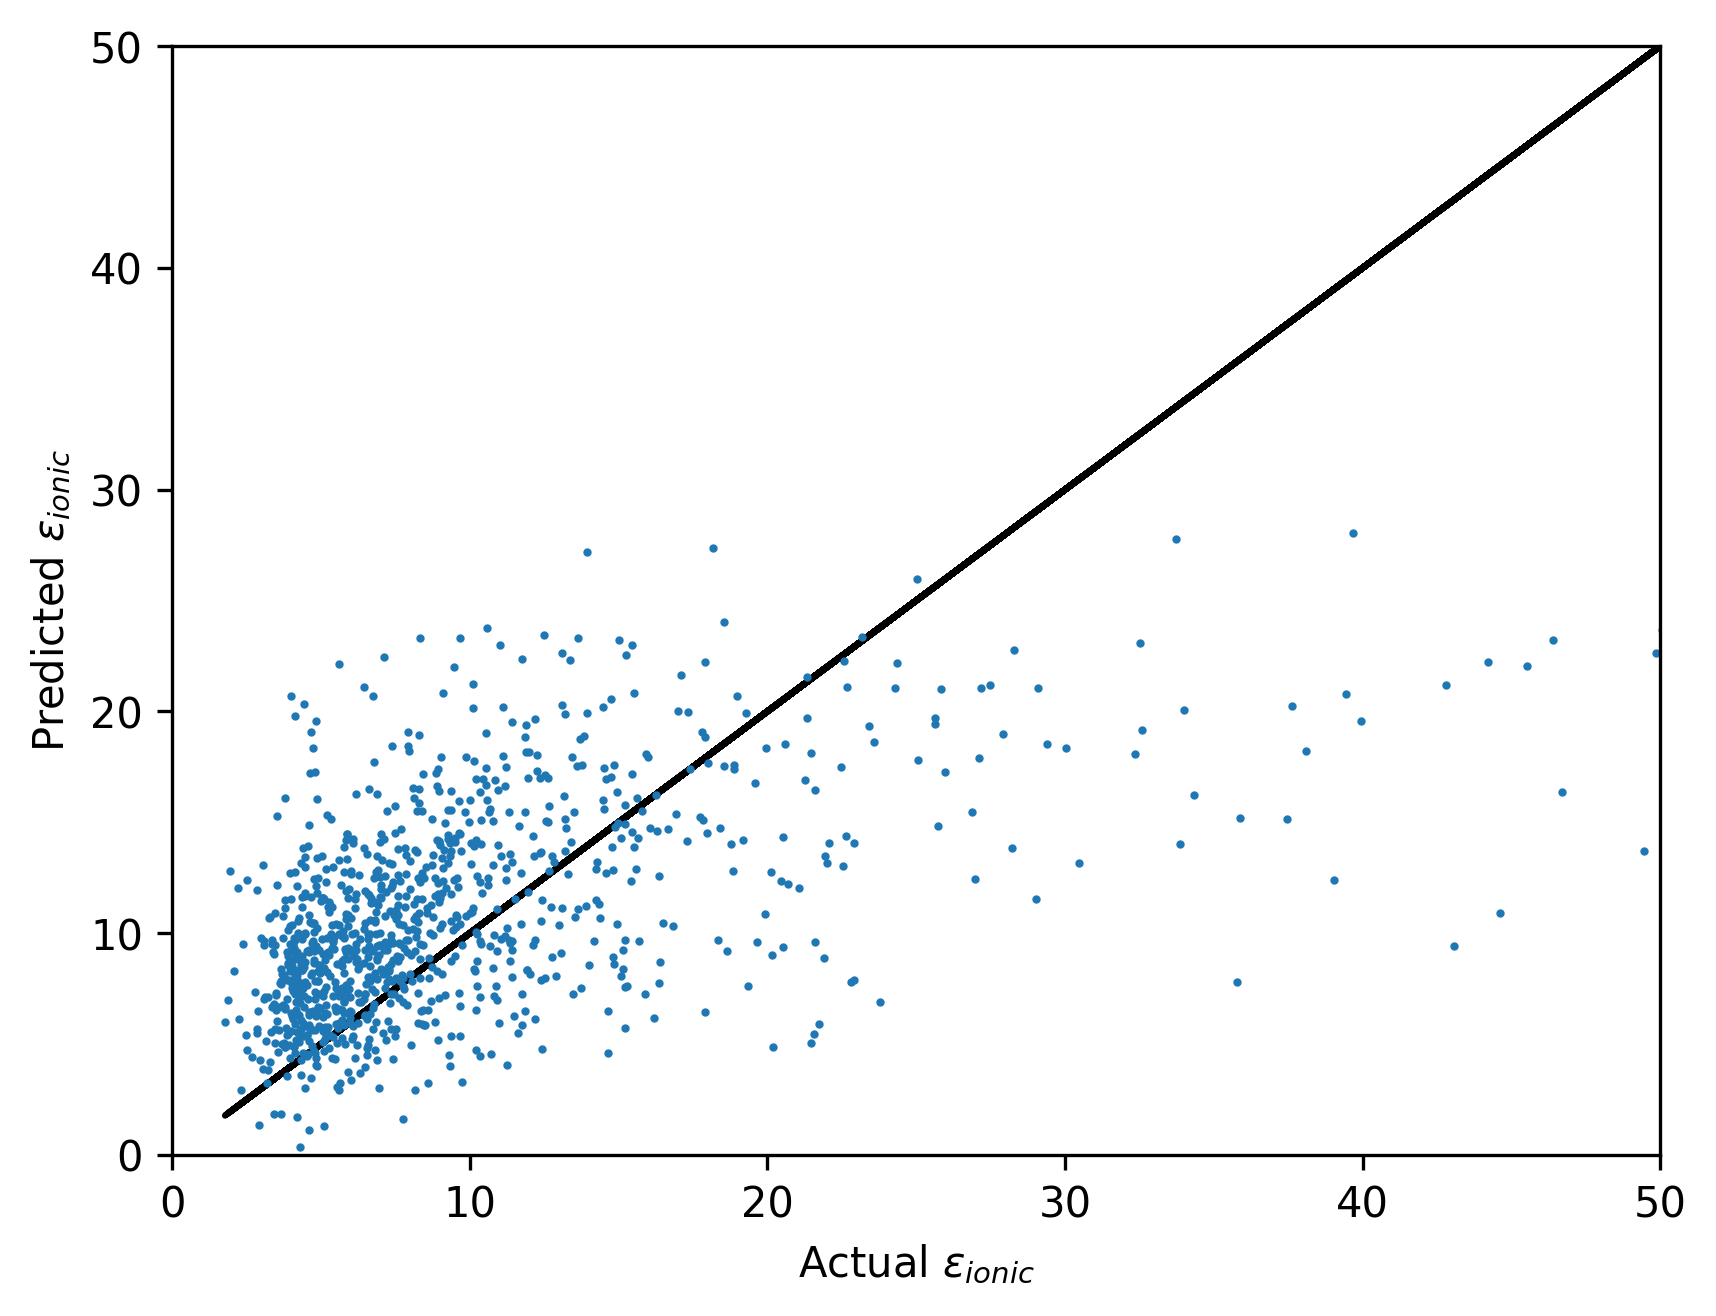

MSE: 137.40885484286864, MAE: 6.445855848436199


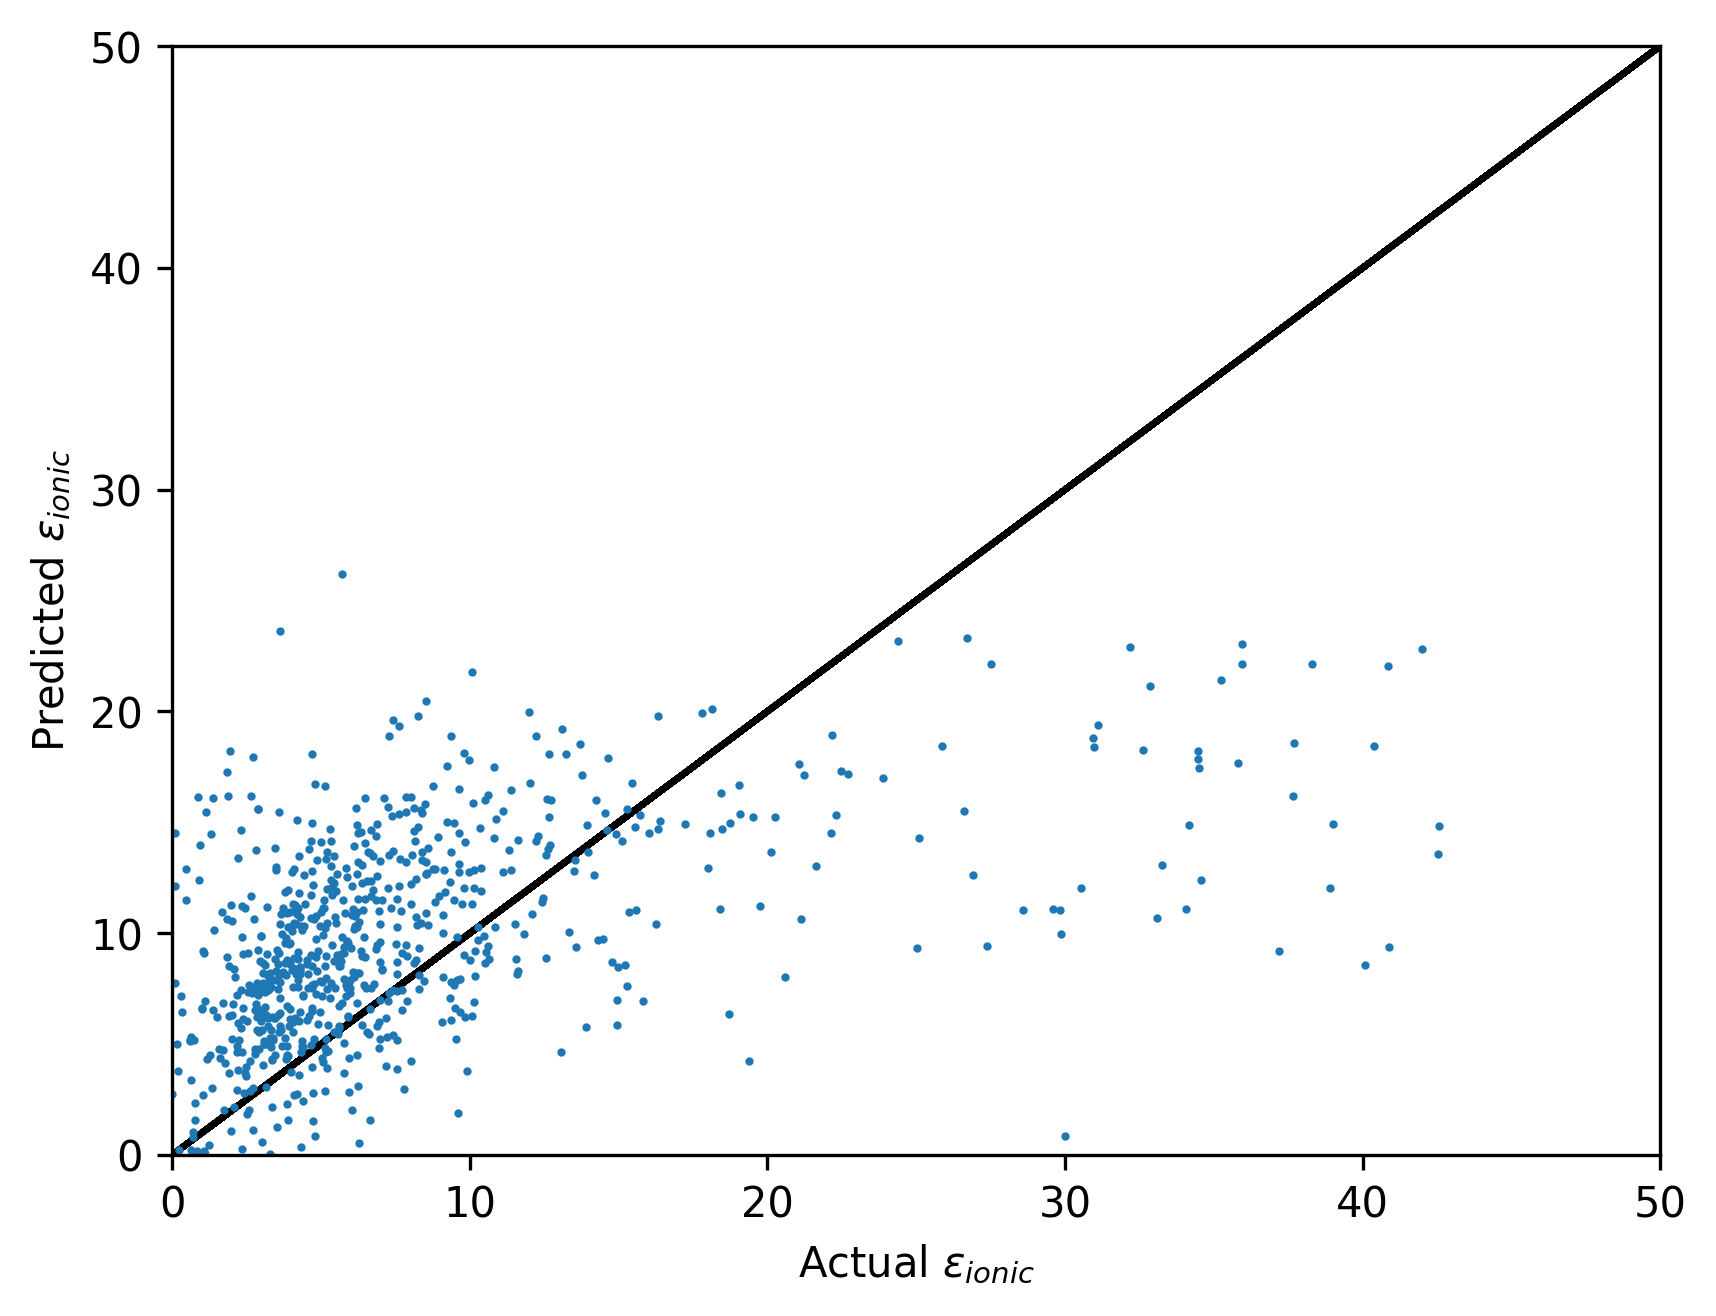

In [38]:
grouped_data = X_train.groupby('cluster')
# 对每个group进行训练
lr_models = {}
lr_scalers = {}
for group, data_group in grouped_data:
    # 仅训练数据量超过400个的
    if len(data_group) < 400:
        continue
    X, y = get_X_y(data_group)
    scaler, X_scaled = scale(X)
    lr = linear_regression(X_scaled, y)
    lr_models[group] = lr
    lr_scalers[group] = scaler


In [39]:
lr_models

{3: LinearRegression(),
 6: LinearRegression(),
 7: LinearRegression(),
 8: LinearRegression(),
 9: LinearRegression()}

In [40]:
lr_scalers

{3: StandardScaler(),
 6: StandardScaler(),
 7: StandardScaler(),
 8: StandardScaler(),
 9: StandardScaler()}

##### 模型测试

In [41]:
for index, test_item in X_test.iterrows():
    print(test_item)
    display(pd.DataFrame(test_item).T)
    break

space_group                             160.000000
band_gap                                  0.792100
density                                   4.086507
density_atomic                           10.994694
formation_energy_per_atom                -2.019264
e_total                                  14.078999
e_ionic                                   6.862966
e_electronic                              7.216033
MagpieData minimum Number                 3.000000
MagpieData maximum Number                25.000000
MagpieData range Number                  22.000000
MagpieData mean Number                   12.769231
MagpieData minimum CovalentRadius        66.000000
MagpieData maximum CovalentRadius       139.000000
MagpieData range CovalentRadius          73.000000
MagpieData mean CovalentRadius           93.230769
MagpieData minimum Electronegativity      0.980000
MagpieData maximum Electronegativity      3.440000
MagpieData range Electronegativity        2.460000
MagpieData mean Electronegativi

,space_group,band_gap,density,density_atomic,formation_energy_per_atom,e_total,e_ionic,e_electronic,MagpieData minimum Number,MagpieData maximum Number,...,MagpieData mean Number,MagpieData minimum CovalentRadius,MagpieData maximum CovalentRadius,MagpieData range CovalentRadius,MagpieData mean CovalentRadius,MagpieData minimum Electronegativity,MagpieData maximum Electronegativity,MagpieData range Electronegativity,MagpieData mean Electronegativity,cluster
5093,160.0,0.7921,4.086507,10.994694,-2.019264,14.078999,6.862966,7.216033,3.0,25.0,...,12.769231,66.0,139.0,73.0,93.230769,0.98,3.44,2.46,2.677692,9.0


In [42]:
# 模型测试
def model_test(X_test, models, scalers):
    X_test_copy = X_test.copy()
    y_preds = []
    for index, test_item in X_test_copy.iterrows():
        cluster = test_item['cluster']
        if cluster not in models.keys():
            y_preds.append(None)
            continue
        X_item = test_item.drop(['e_total', 'e_ionic', 'e_electronic'])
        X_item_scaled = scalers[cluster].transform(pd.DataFrame(X_item).T)

        y_pred = models[cluster].predict(X_item_scaled)
        y_preds.append(y_pred[0])
        # print(f'Cluster: {cluster}, Predicted e_electronic: {y_pred[0]}')
        
    X_test_copy['e_ionic_pred'] = y_preds
    X_test_copy.dropna(axis=0, inplace=True)
    mse = mean_squared_error(X_test_copy['e_ionic'], X_test_copy['e_ionic_pred'])
    mae = mean_absolute_error(X_test_copy['e_ionic'], X_test_copy['e_ionic_pred'])
    plot_cross_val_scores(mse, mae, X_test_copy['e_ionic_pred'], X_test_copy['e_ionic'])

    return mse, mae, X_test_copy

MSE: 171.669489376756, MAE: 6.791379555621349


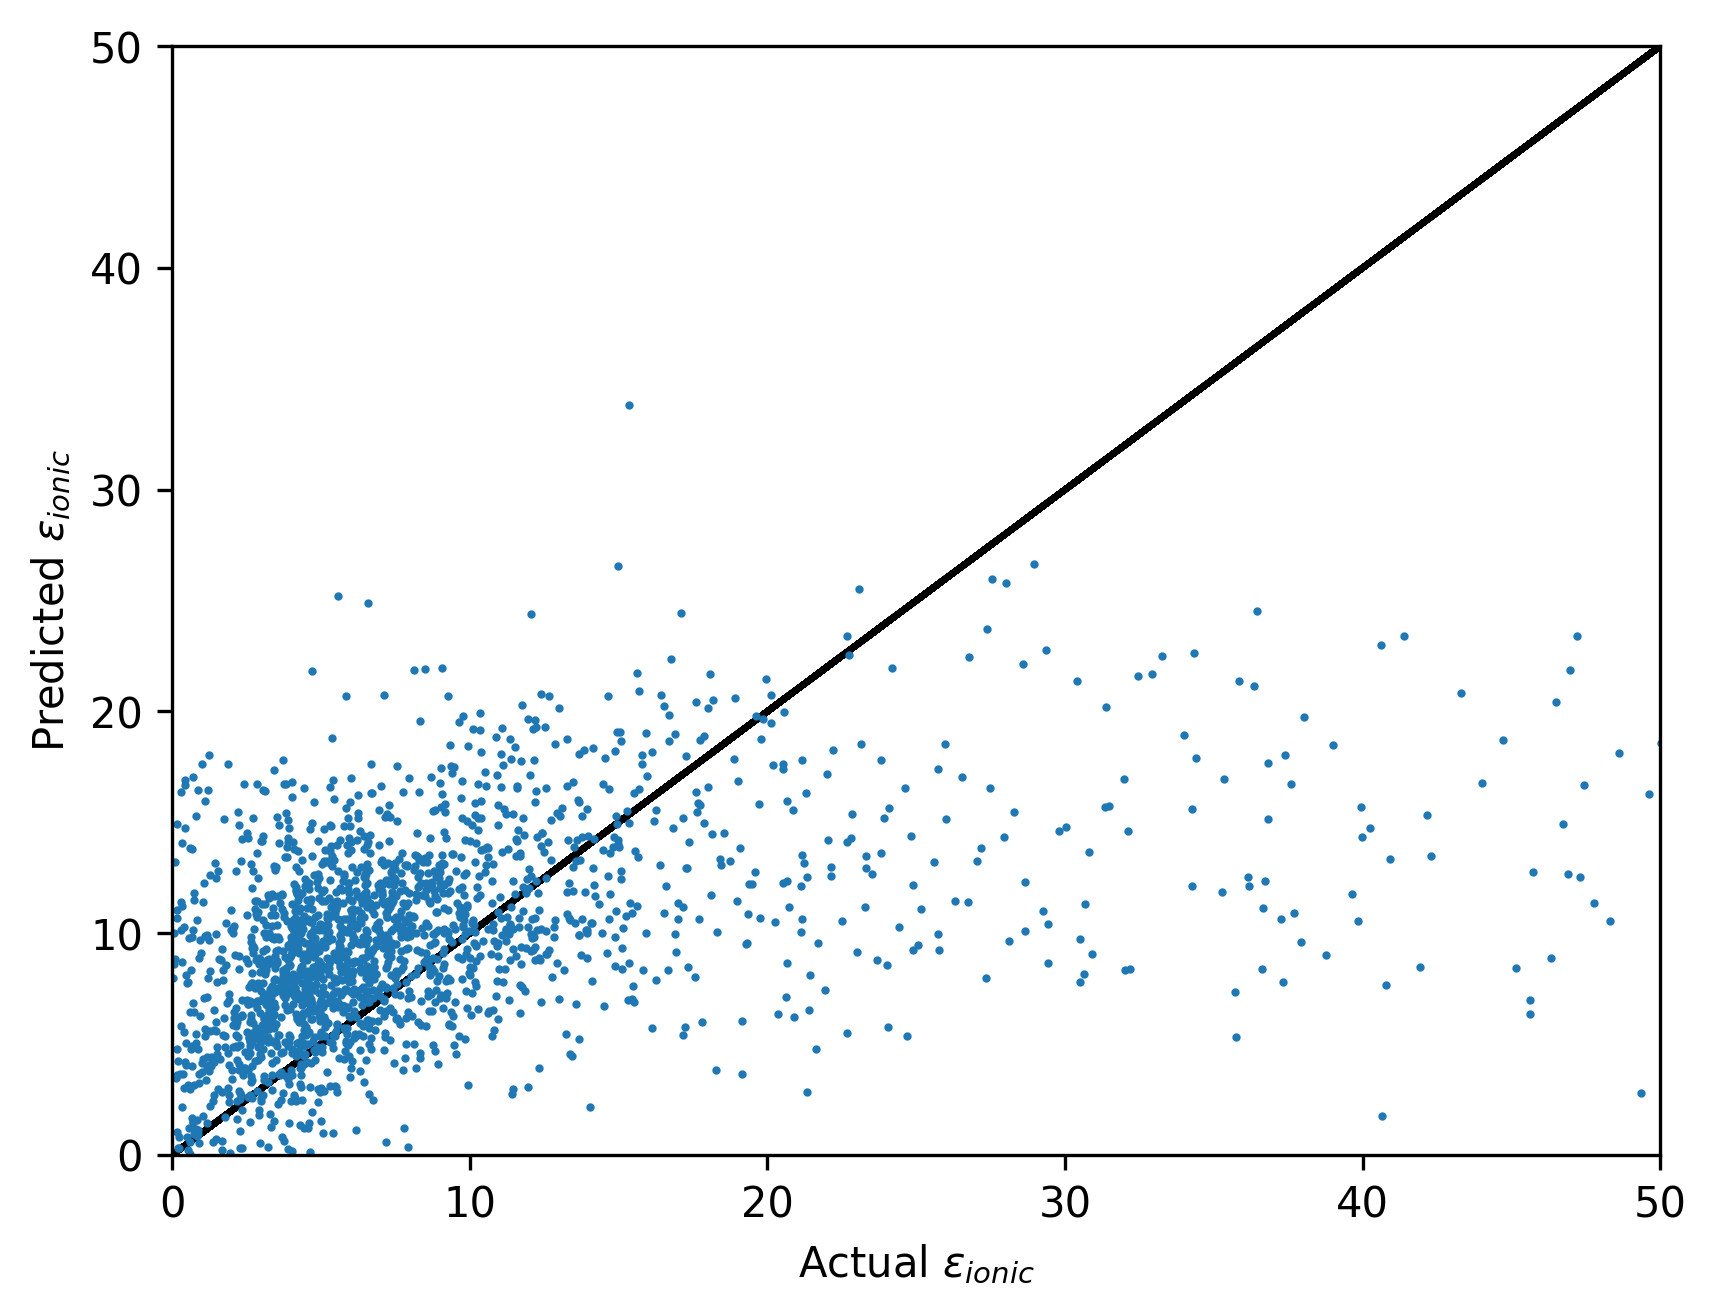

In [43]:
model_test(X_test, lr_models, lr_scalers);

#### 2. 决策树模型


In [44]:
from sklearn.tree import DecisionTreeRegressor, plot_tree       # ML model

def decision_tree(X_train, y_train):
    # 进行交叉验证选择最好的深度

    max_scores=-1e5
    best_depth = 0
    for depth in range(5, 15):
        dt = DecisionTreeRegressor(max_depth=depth,random_state=RANDOM_STATE)      # decision tree constructor
        scores, y_hat = model_cross_train(dt, X_train, y_train)                              
        if scores.mean() > max_scores:
            max_scores = scores.mean()
            best_depth = depth
            # plot_cross_val_scores(scores.mean(), None, y_hat, y_train)
    # 确定超参数MAX_DEPTH后，使用最优的超参数在整个训练集上训练模型
    # 模型训练
    dt = DecisionTreeRegressor(max_depth=best_depth, random_state=RANDOM_STATE)
    dt.fit(X_train, y_train)
    # 模型训练集测试
    mse, mae, y_pred = model_eval(dt, X_train, y_train)
    # 绘制结果
    plot_cross_val_scores(mse, mae, y_pred, y_train)
    return dt, best_depth

MSE: 93.61947560197252, MAE: 5.262158258733209


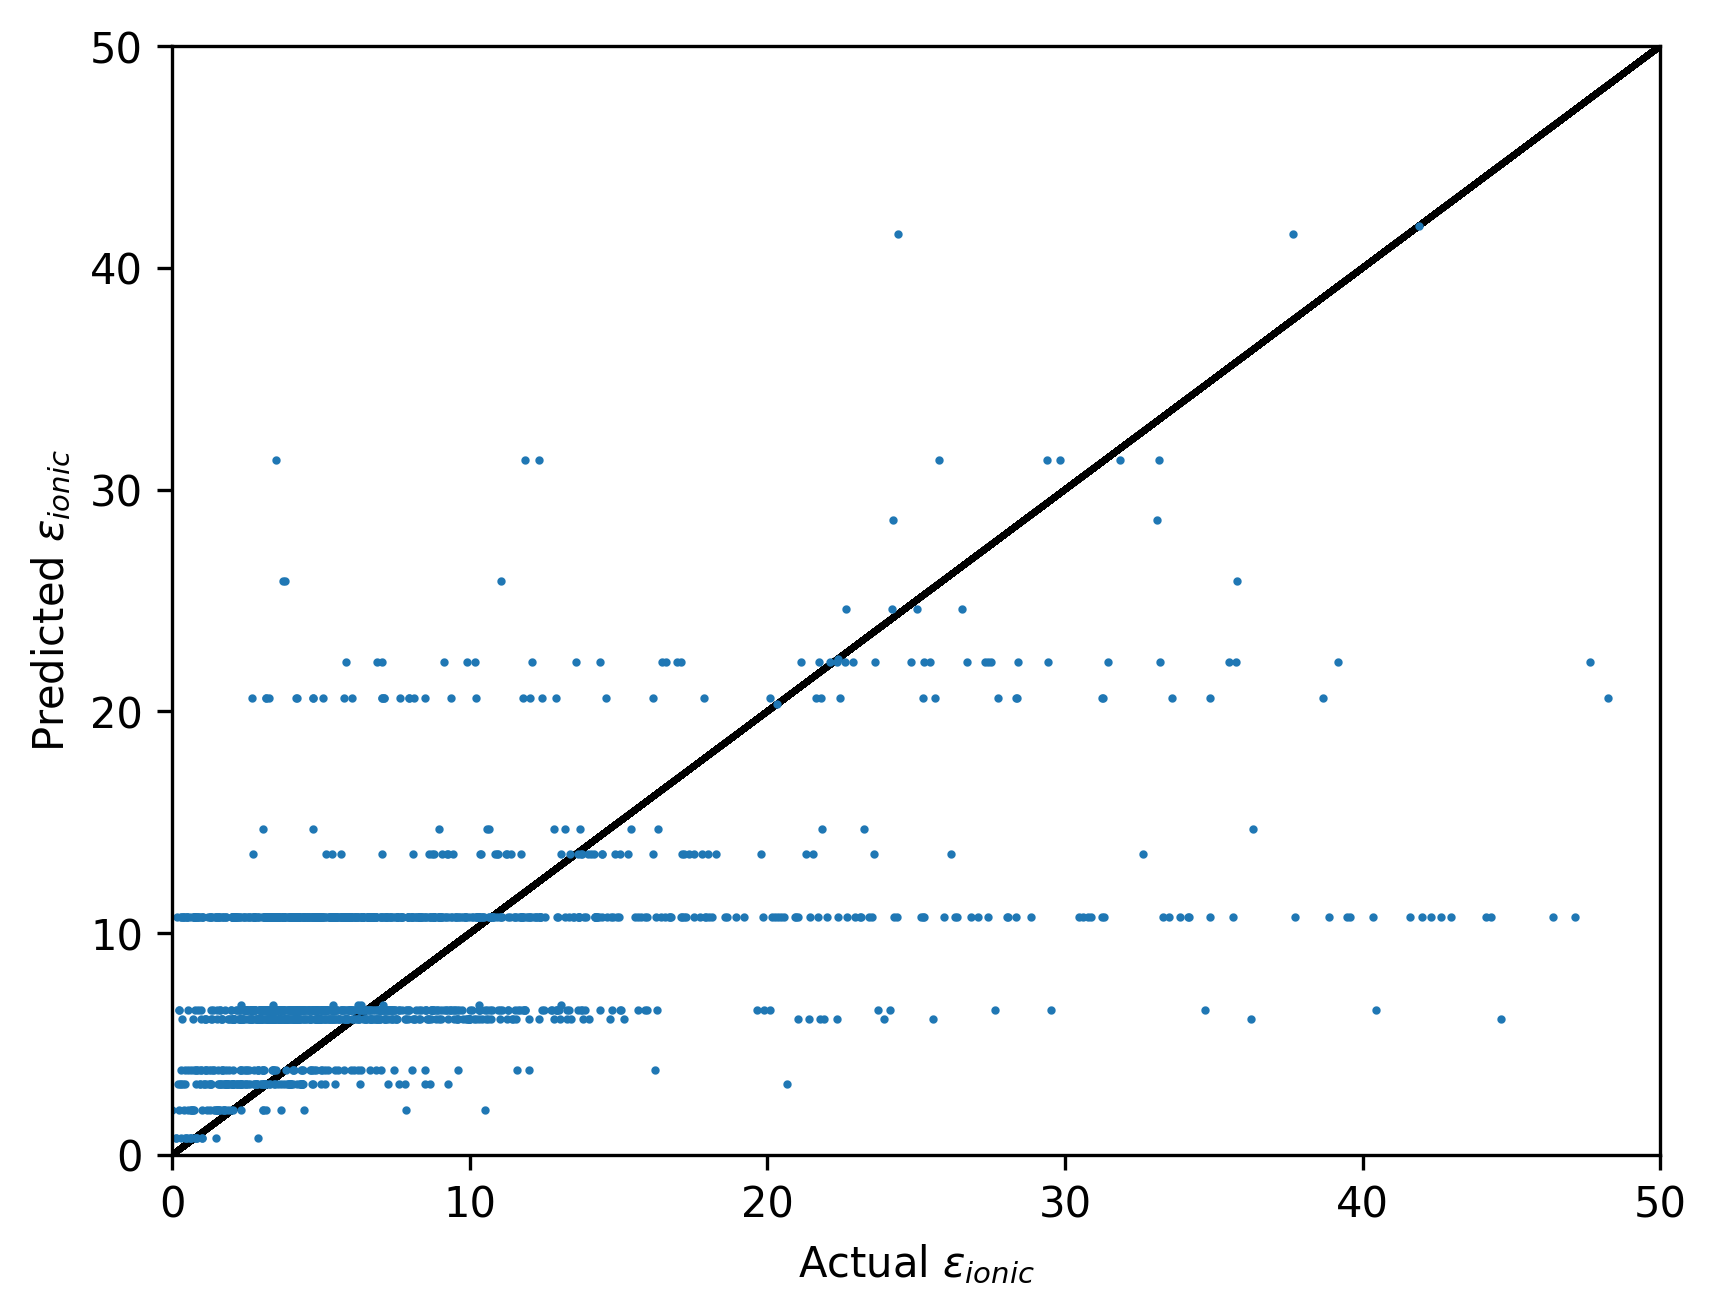

MSE: 36.31657547834977, MAE: 3.678828470383704


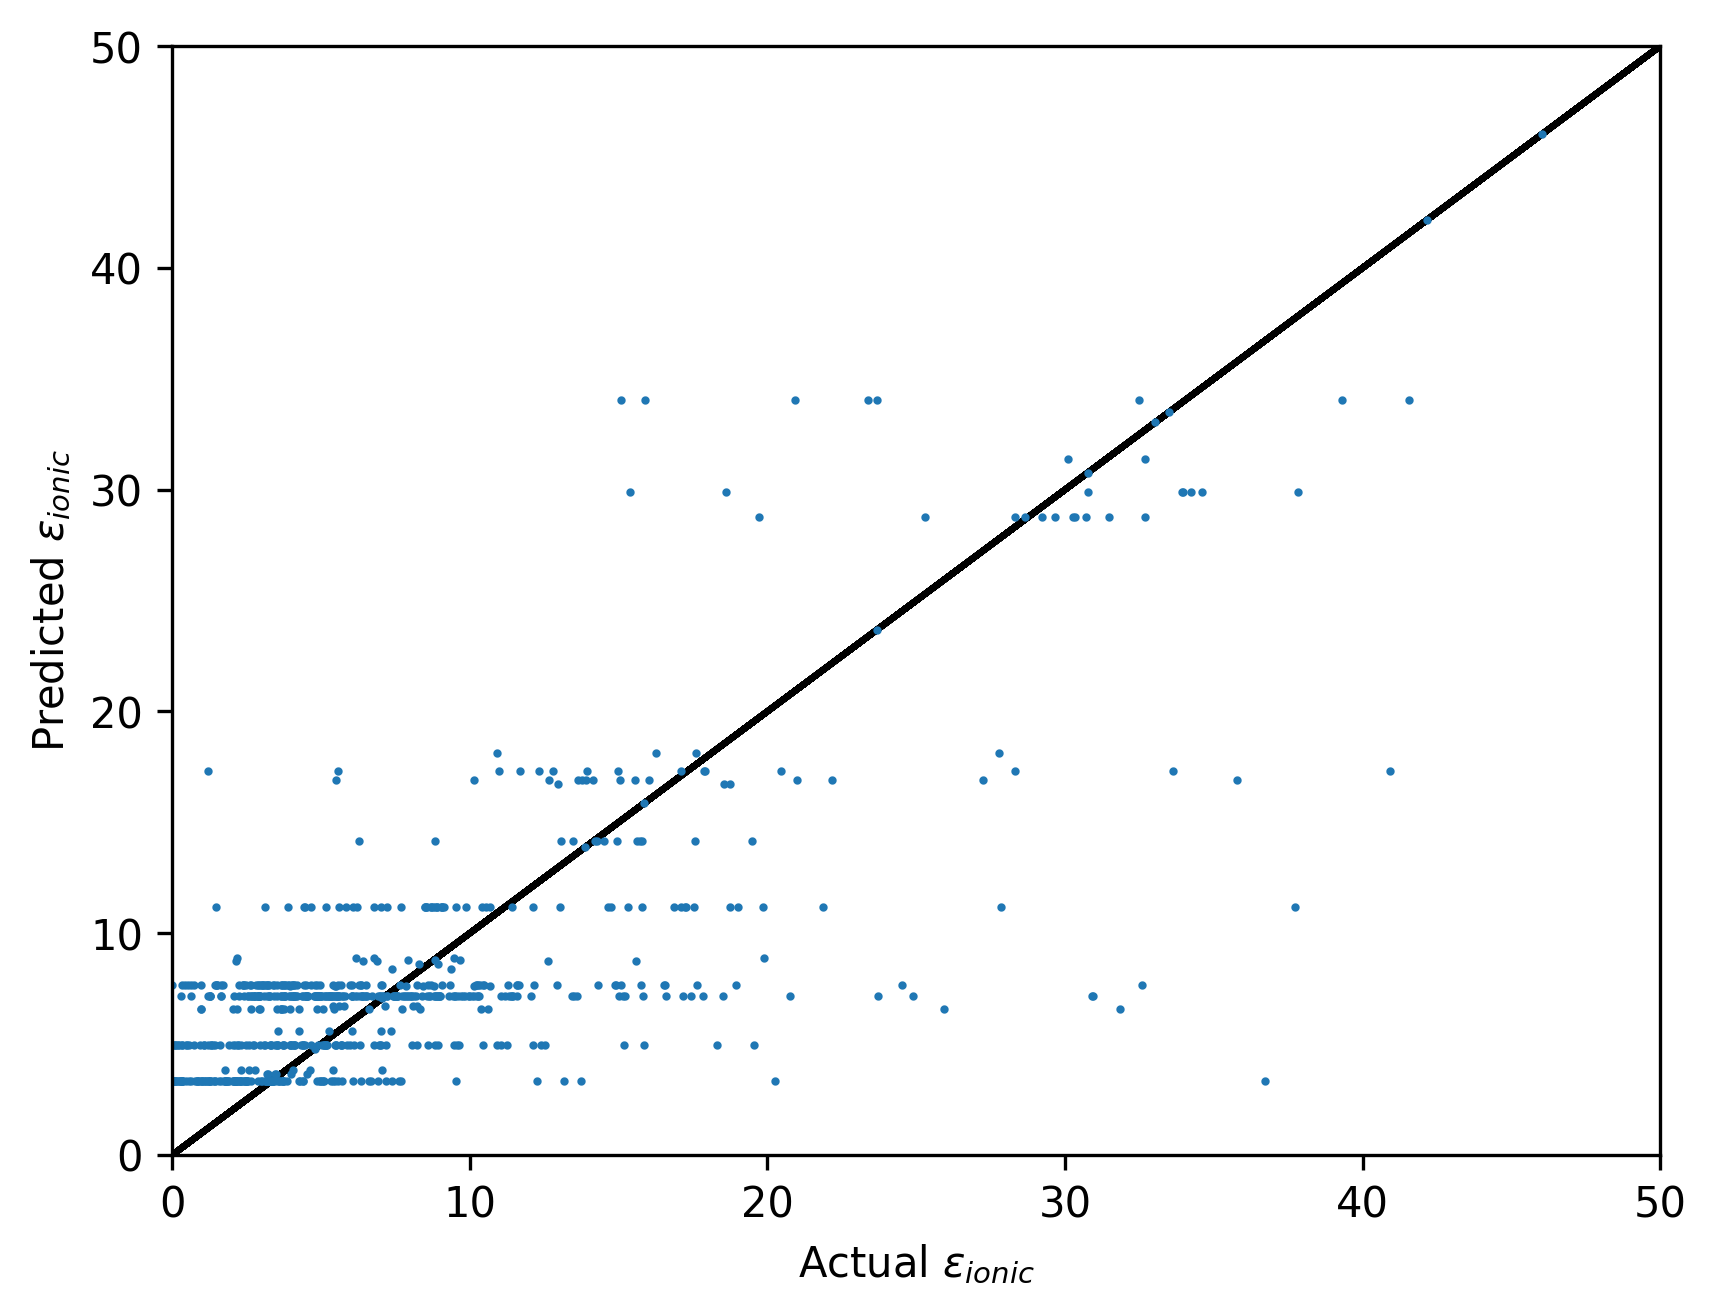

MSE: 71.66530238258109, MAE: 4.962665958115857


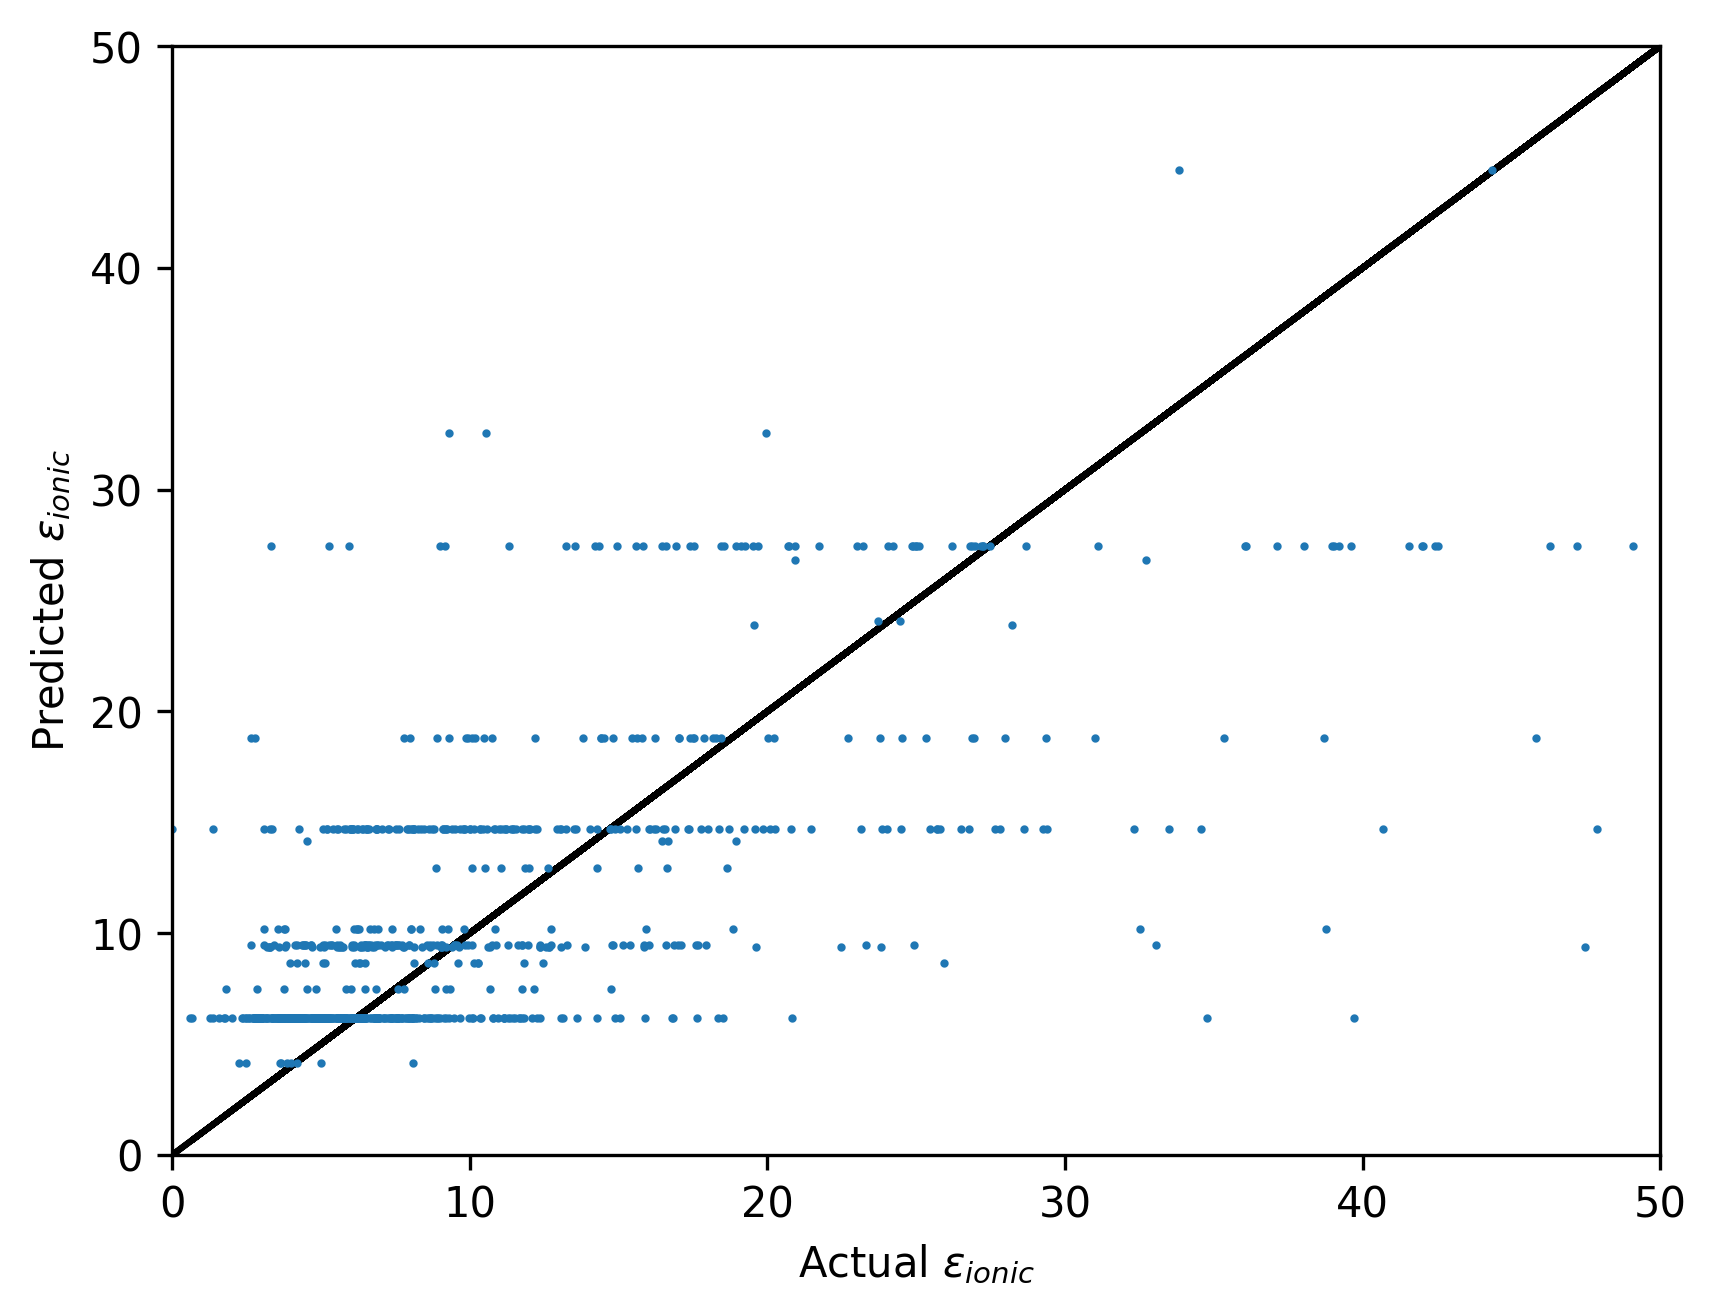

MSE: 67.80829446561185, MAE: 4.340278184160297


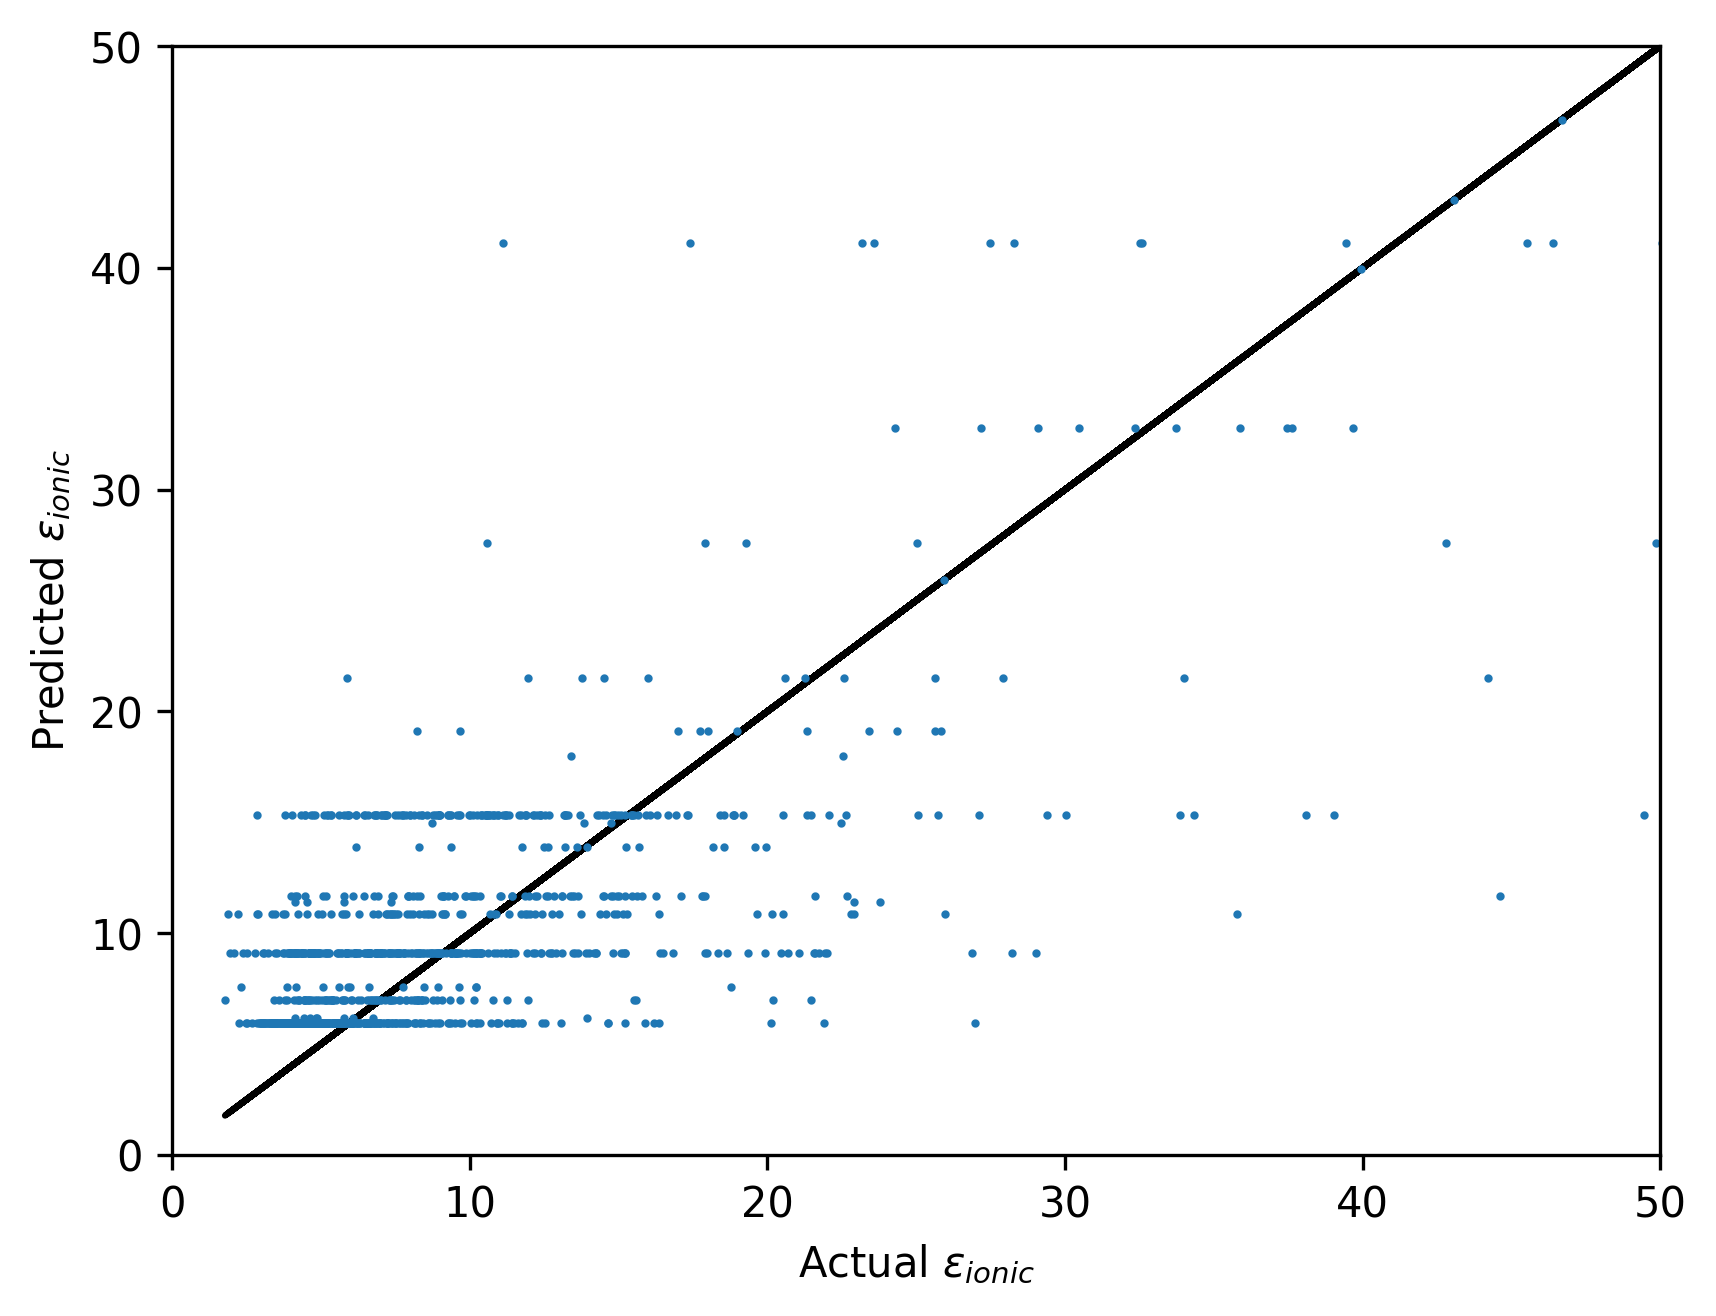

MSE: 68.65975357445348, MAE: 4.3341231019373465


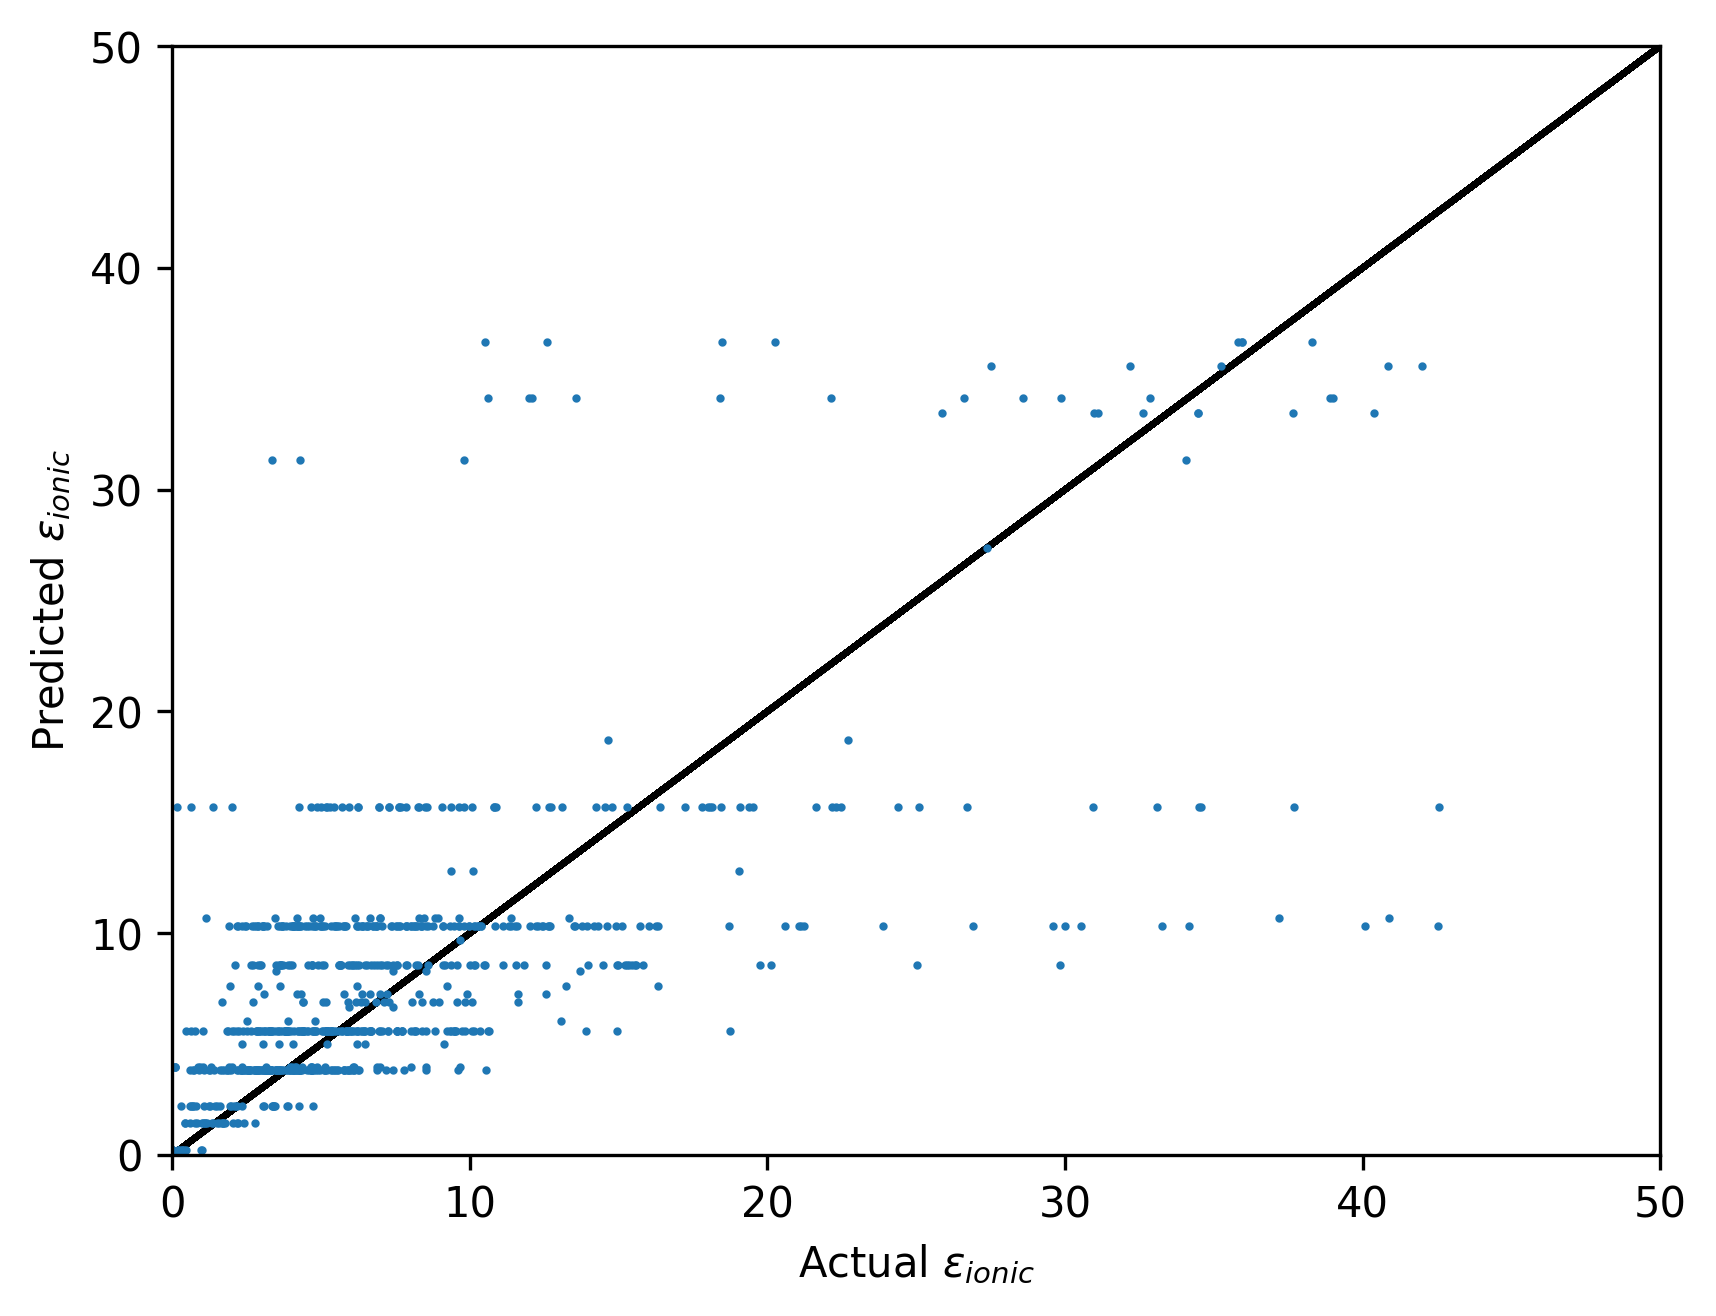

In [45]:
# 对每个group进行训练
dt_models = {}
dt_scalers = {}
best_depths = {}
for group, data_group in grouped_data:
    # 仅训练数据量超过400个的
    if len(data_group) < 400:
        continue
    X, y = get_X_y(data_group)
    scaler, X_scaled = scale(X)
    dt, best_depth = decision_tree(X_scaled, y)
    dt_models[group] = dt
    dt_scalers[group] = scaler
    best_depths[group] = best_depth

In [46]:
best_depths

{3: 5, 6: 6, 7: 5, 8: 5, 9: 5}

##### 模型测试

MSE: 199.7042972372153, MAE: 6.785013752369092


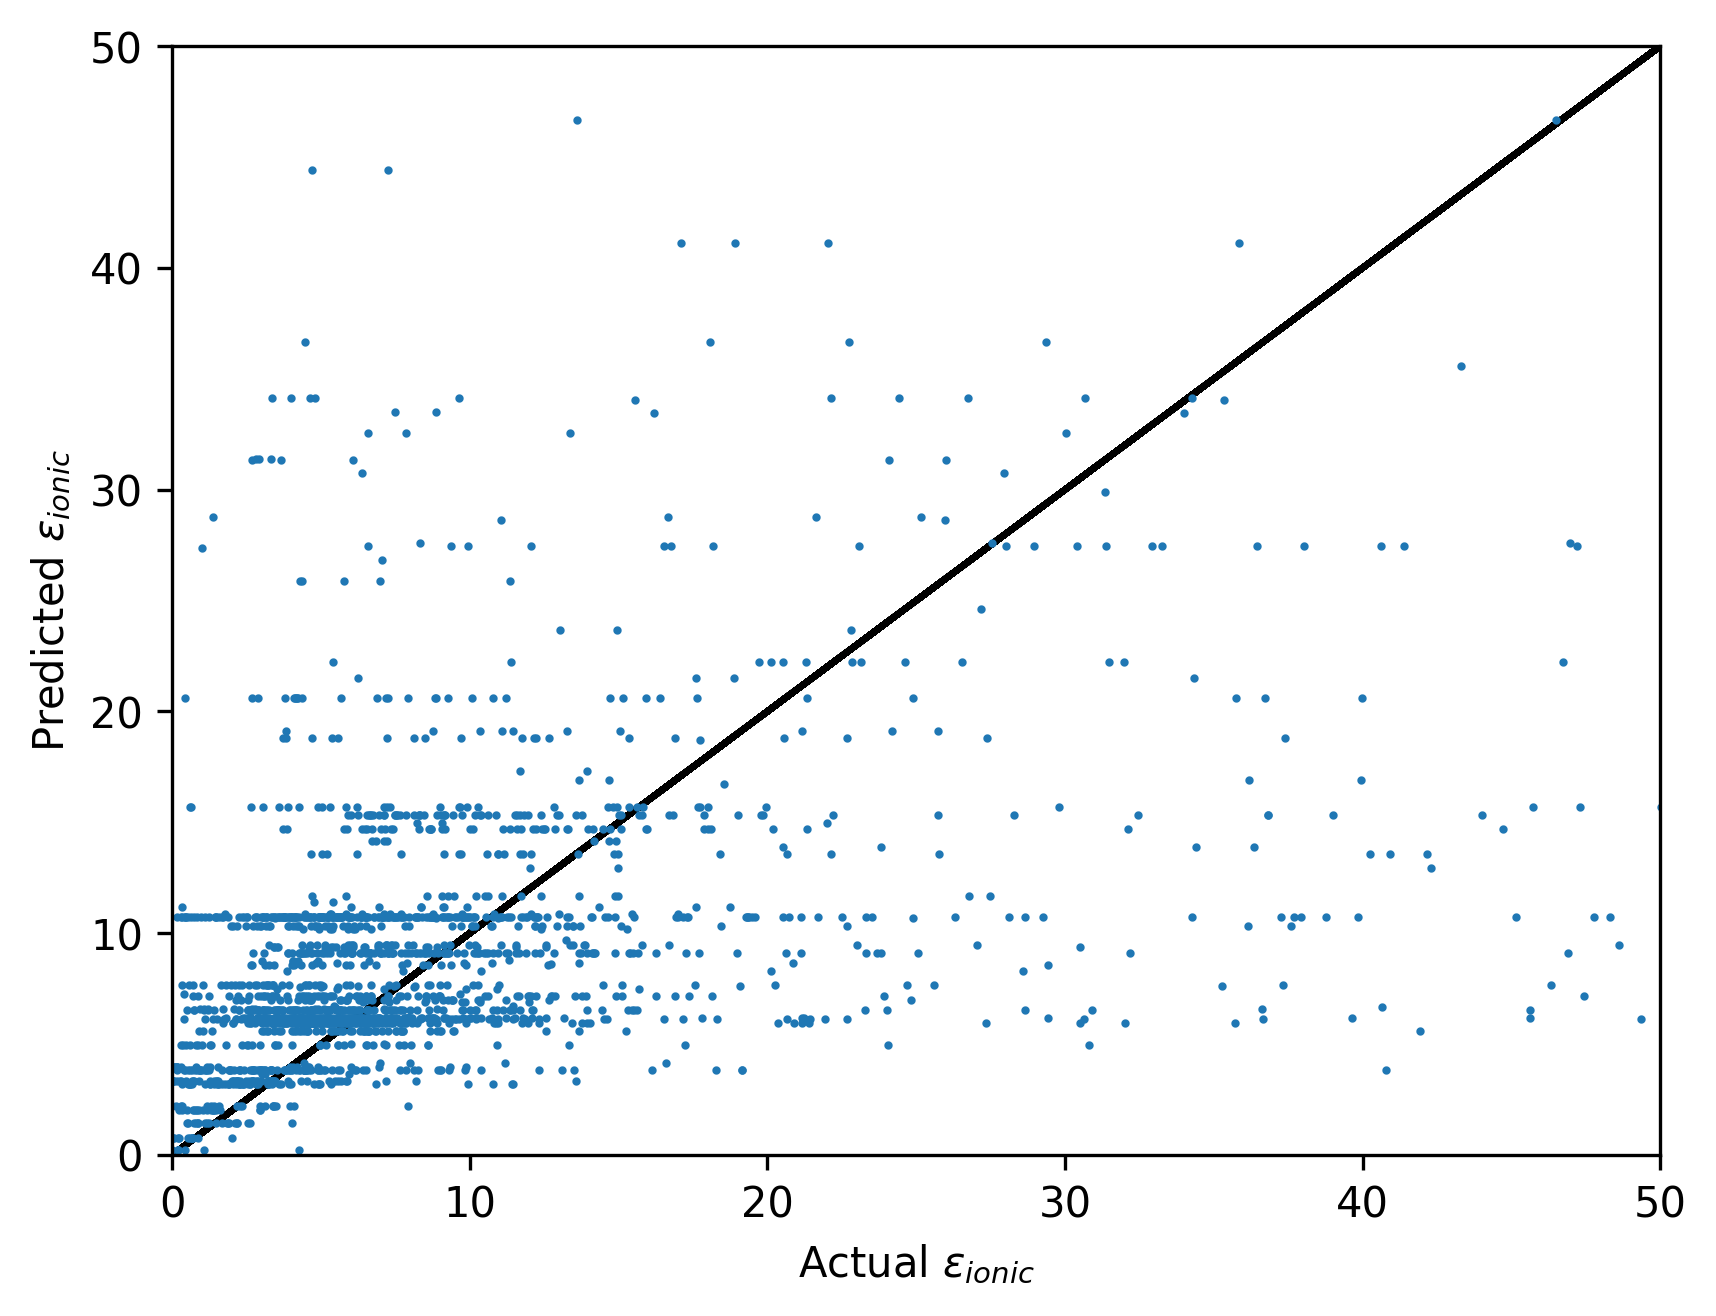

In [47]:
model_test(X_test, dt_models, dt_scalers);

#### 3. 随机森林算法

In [48]:
from sklearn.ensemble import RandomForestRegressor
def random_forest(X_train, y_train, best_depth):
    # 模型训练
    rf = RandomForestRegressor(n_estimators=100, max_depth=best_depth, random_state=RANDOM_STATE)
    rf.fit(X_train, y_train)
    # 模型训练集测试
    mse, mae, y_pred = model_eval(dt, X_train, y_train)
    # 绘制结果
    plot_cross_val_scores(mse, mae, y_pred, y_train)
    return rf

MSE: 145.78928169863732, MAE: 6.42618864689633


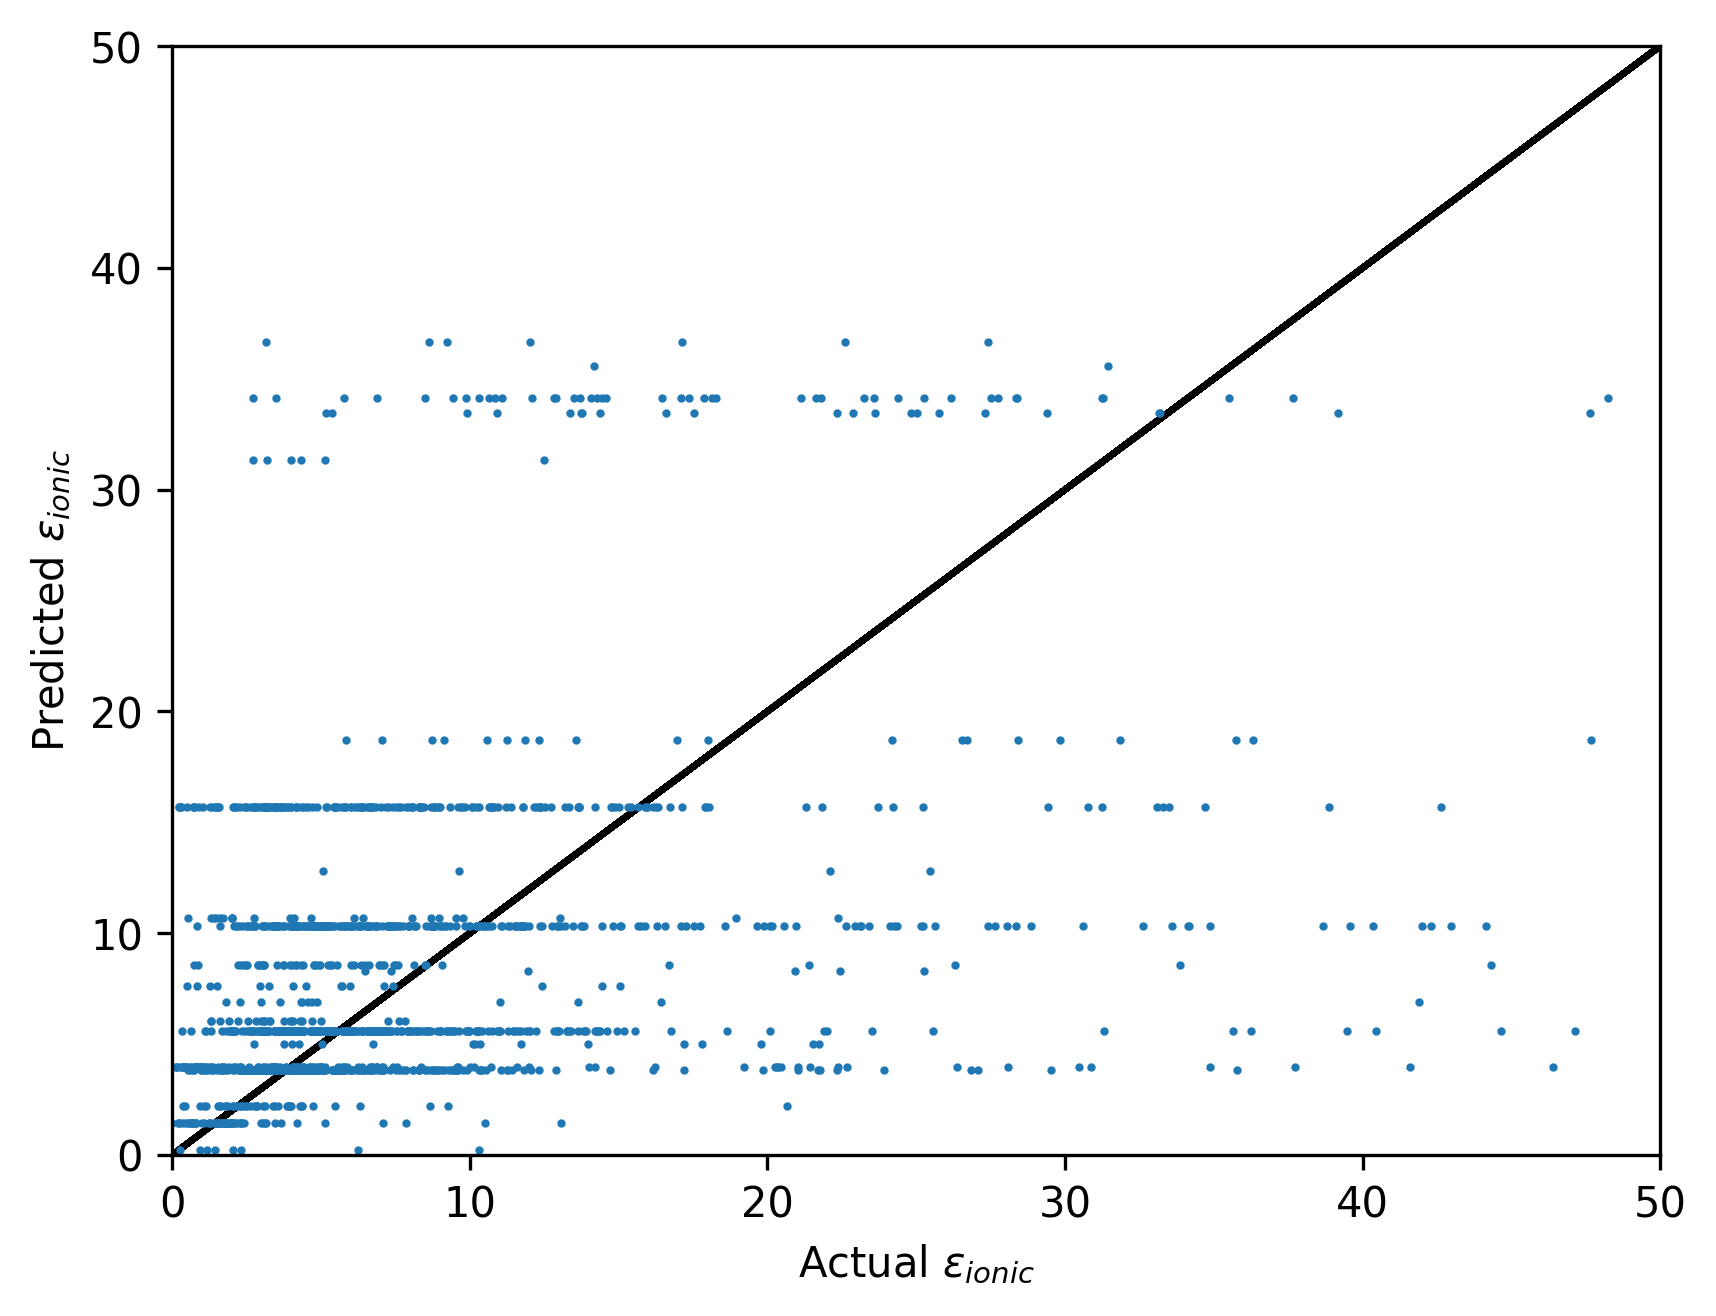

MSE: 174.8934309757518, MAE: 7.184798188602345


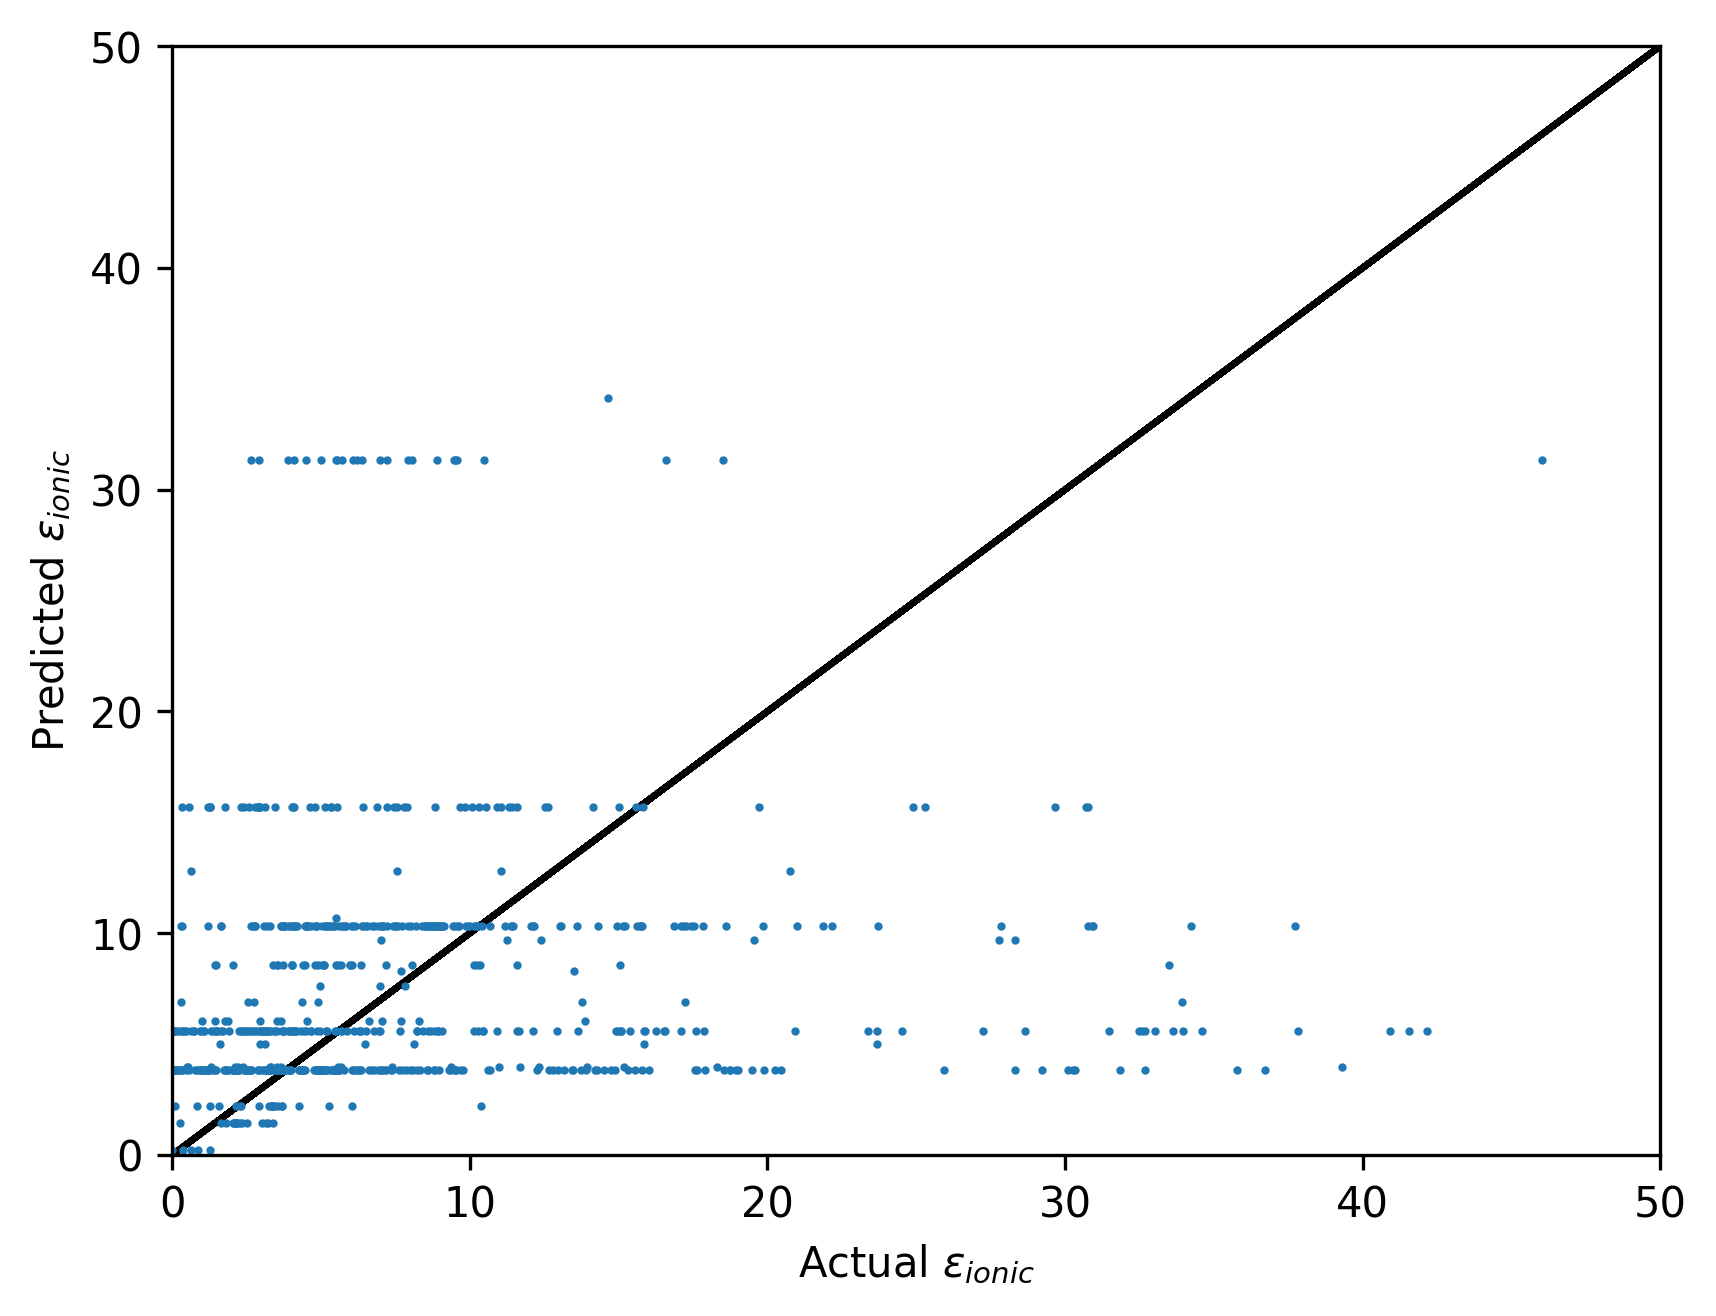

MSE: 185.48140604134431, MAE: 8.037804606804045


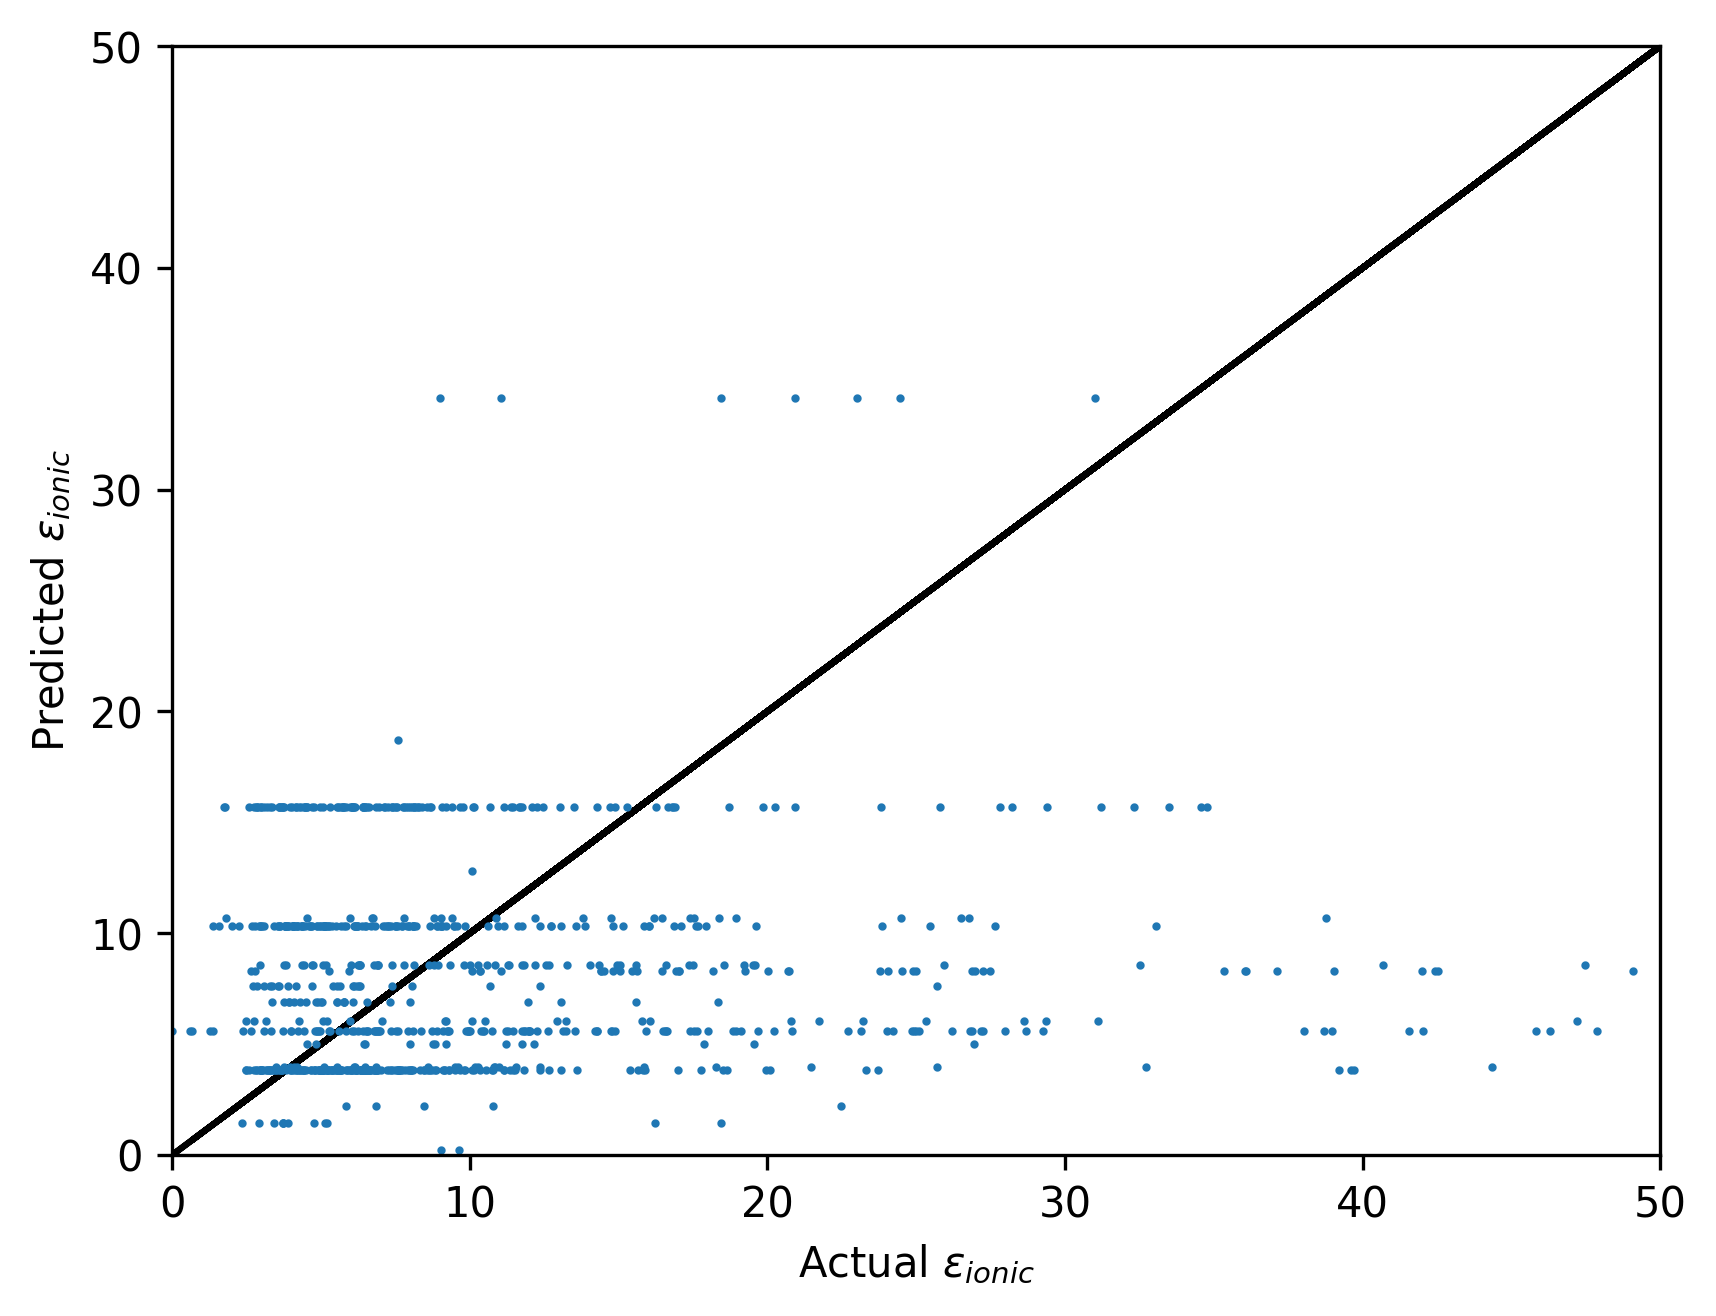

MSE: 182.93826614844667, MAE: 7.579492204470873


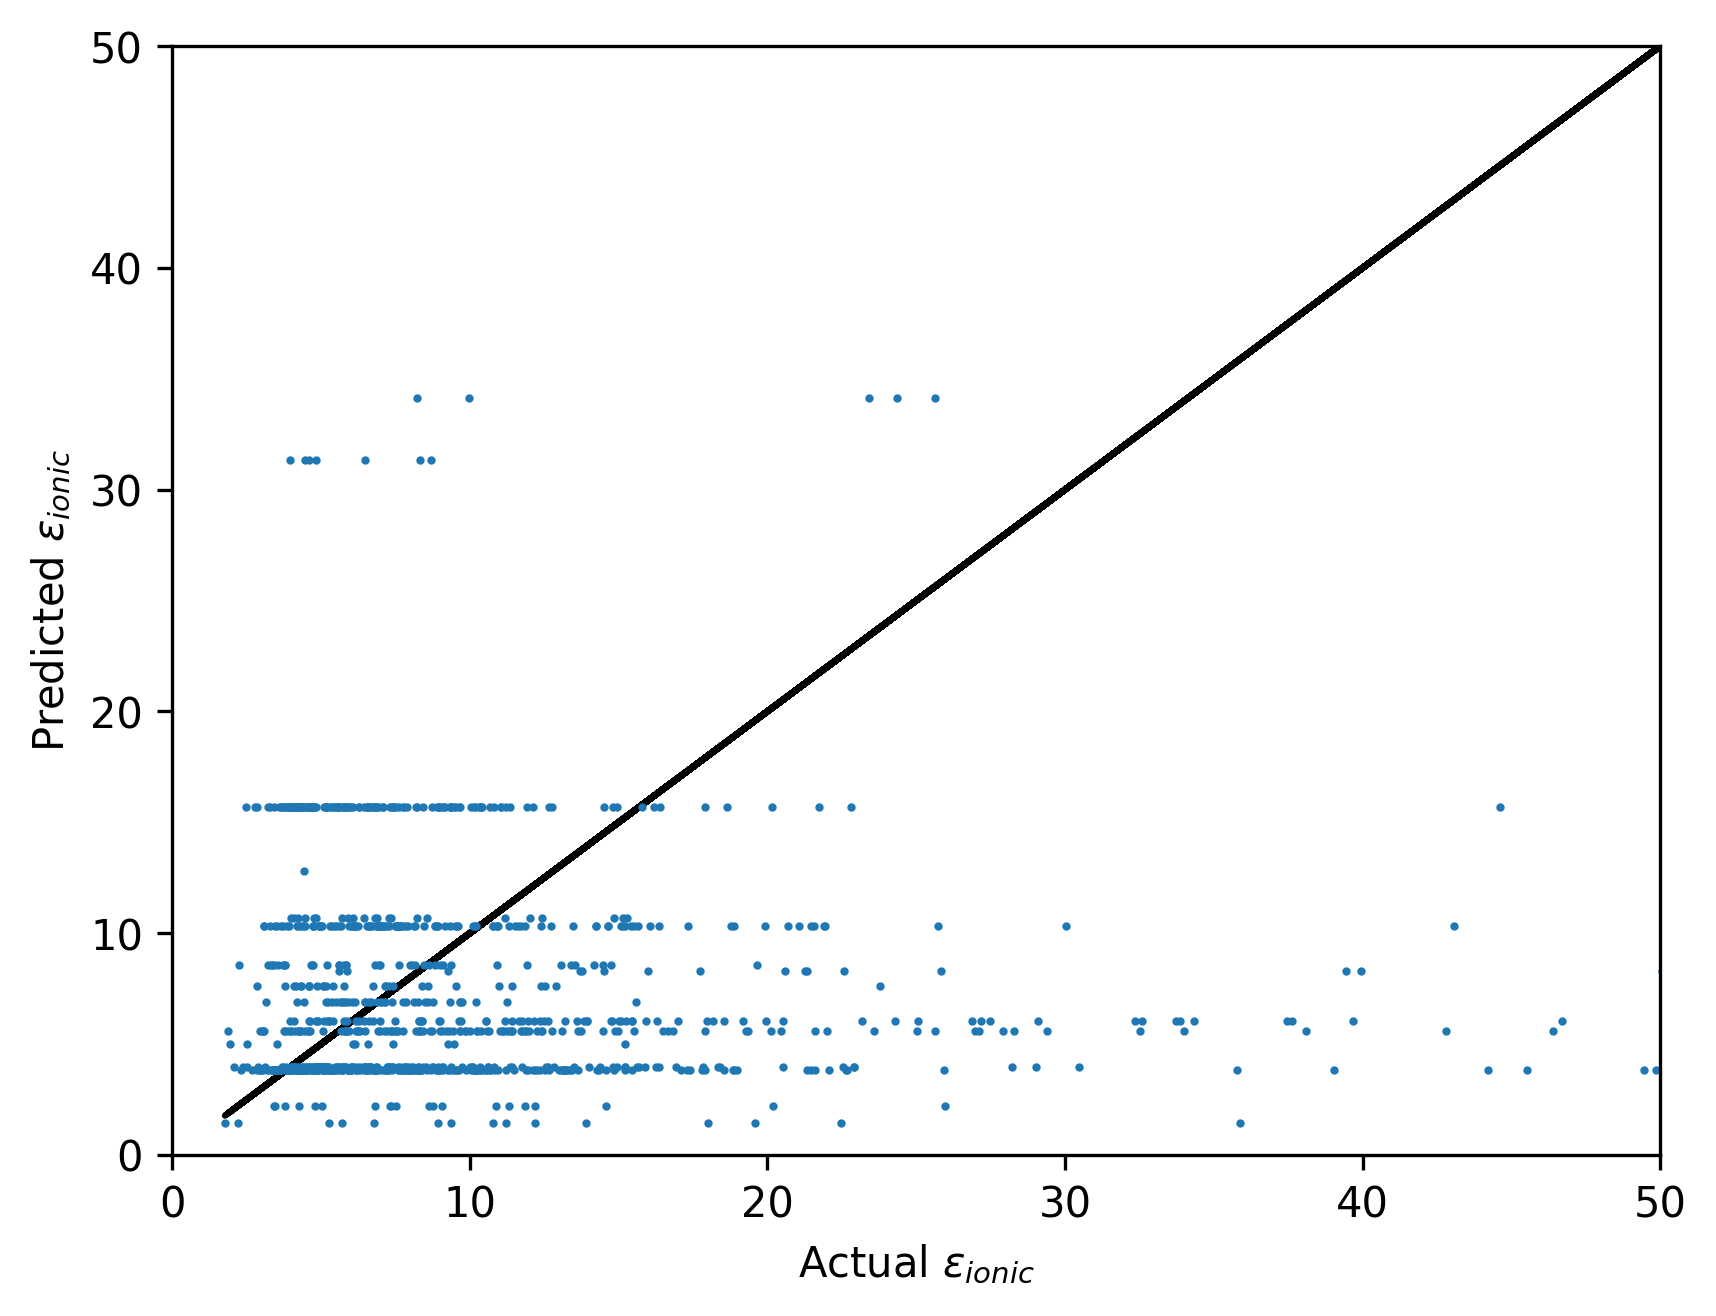

MSE: 68.65975357445348, MAE: 4.3341231019373465


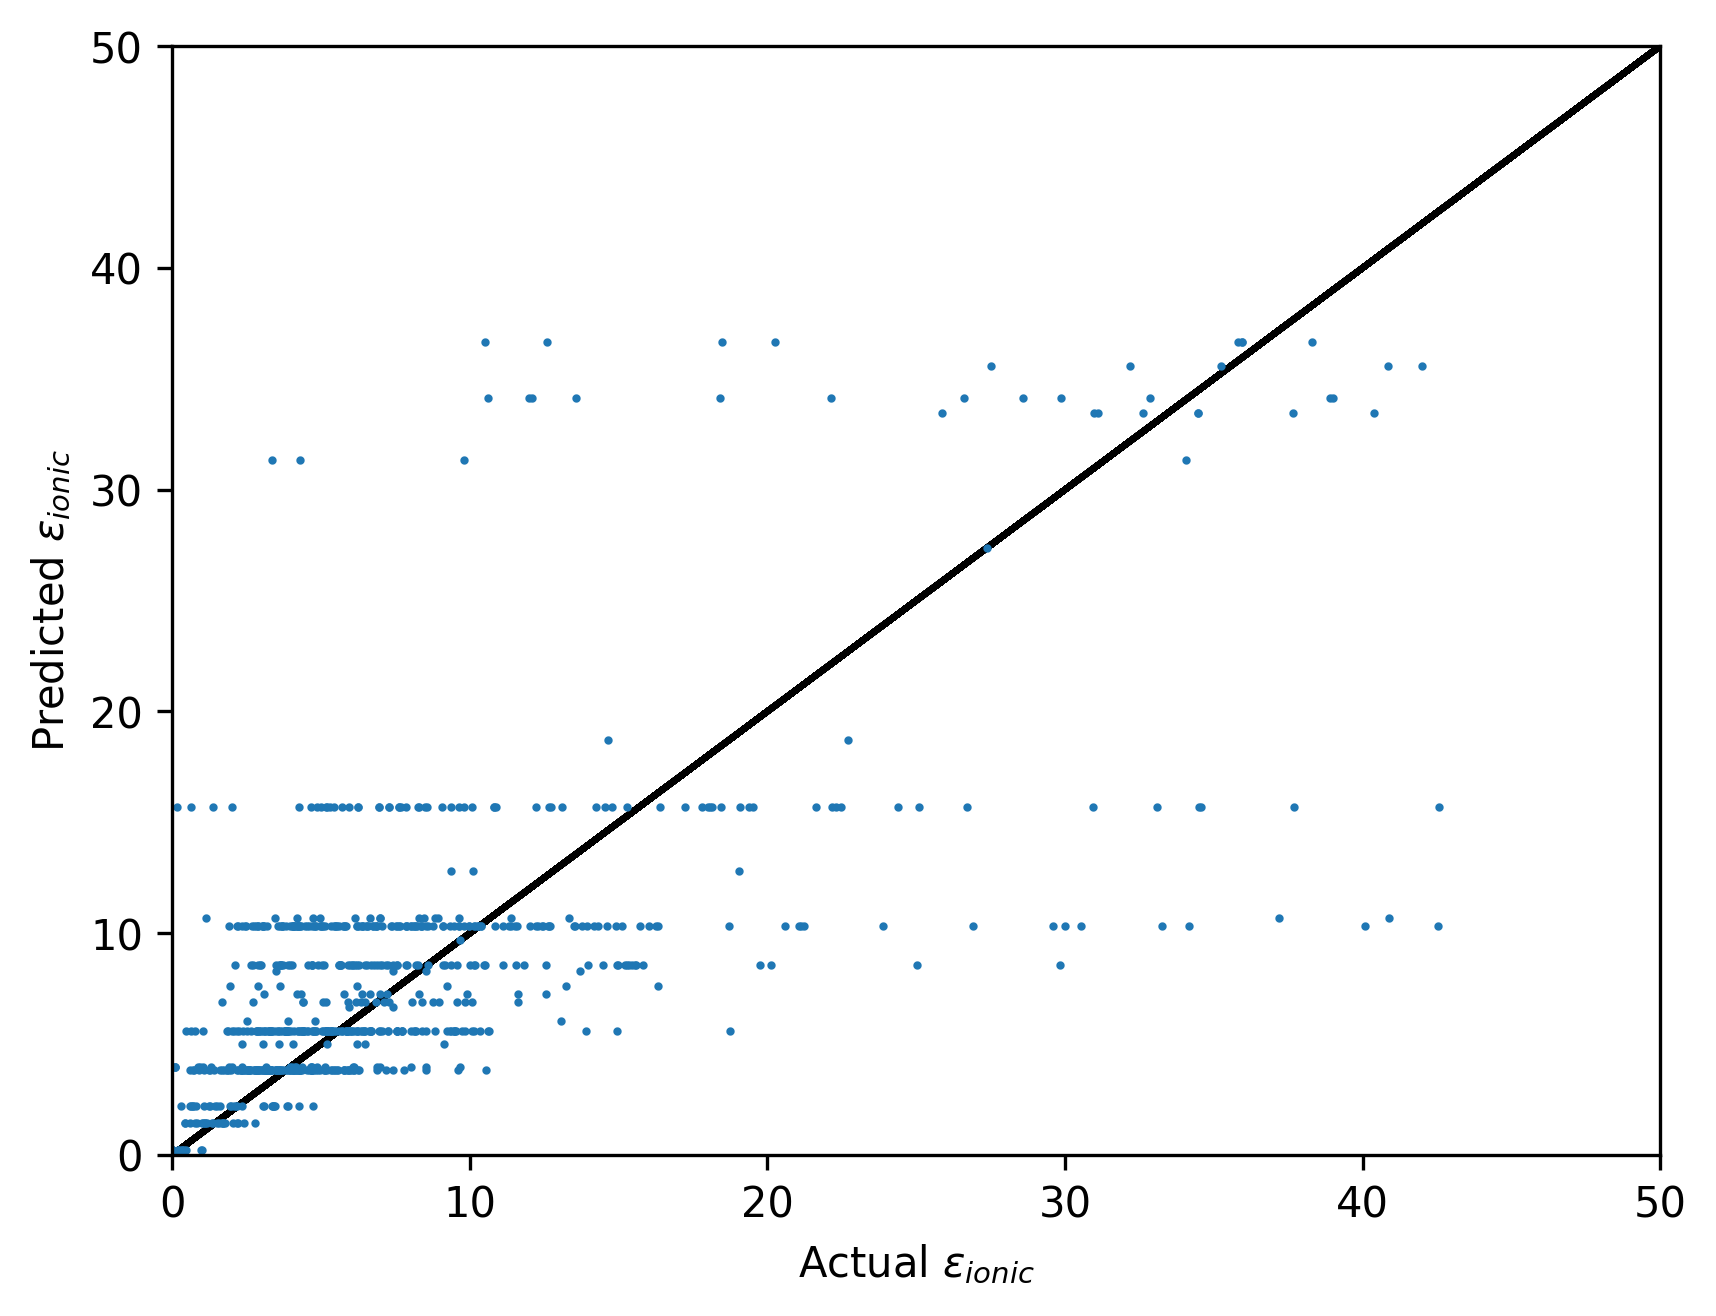

In [49]:
# 对每个group进行训练
rf_models = {}
rf_scalers = {}
for group, data_group in grouped_data:
    # 仅训练数据量超过400个的
    if len(data_group) < 400:
        continue
    X, y = get_X_y(data_group)
    scaler, X_scaled = scale(X)
    rf = random_forest(X_scaled, y, best_depths[group])
    rf_models[group] = rf
    rf_scalers[group] = scaler

##### 模型测试

MSE: 161.5967540195849, MAE: 6.278931501712766


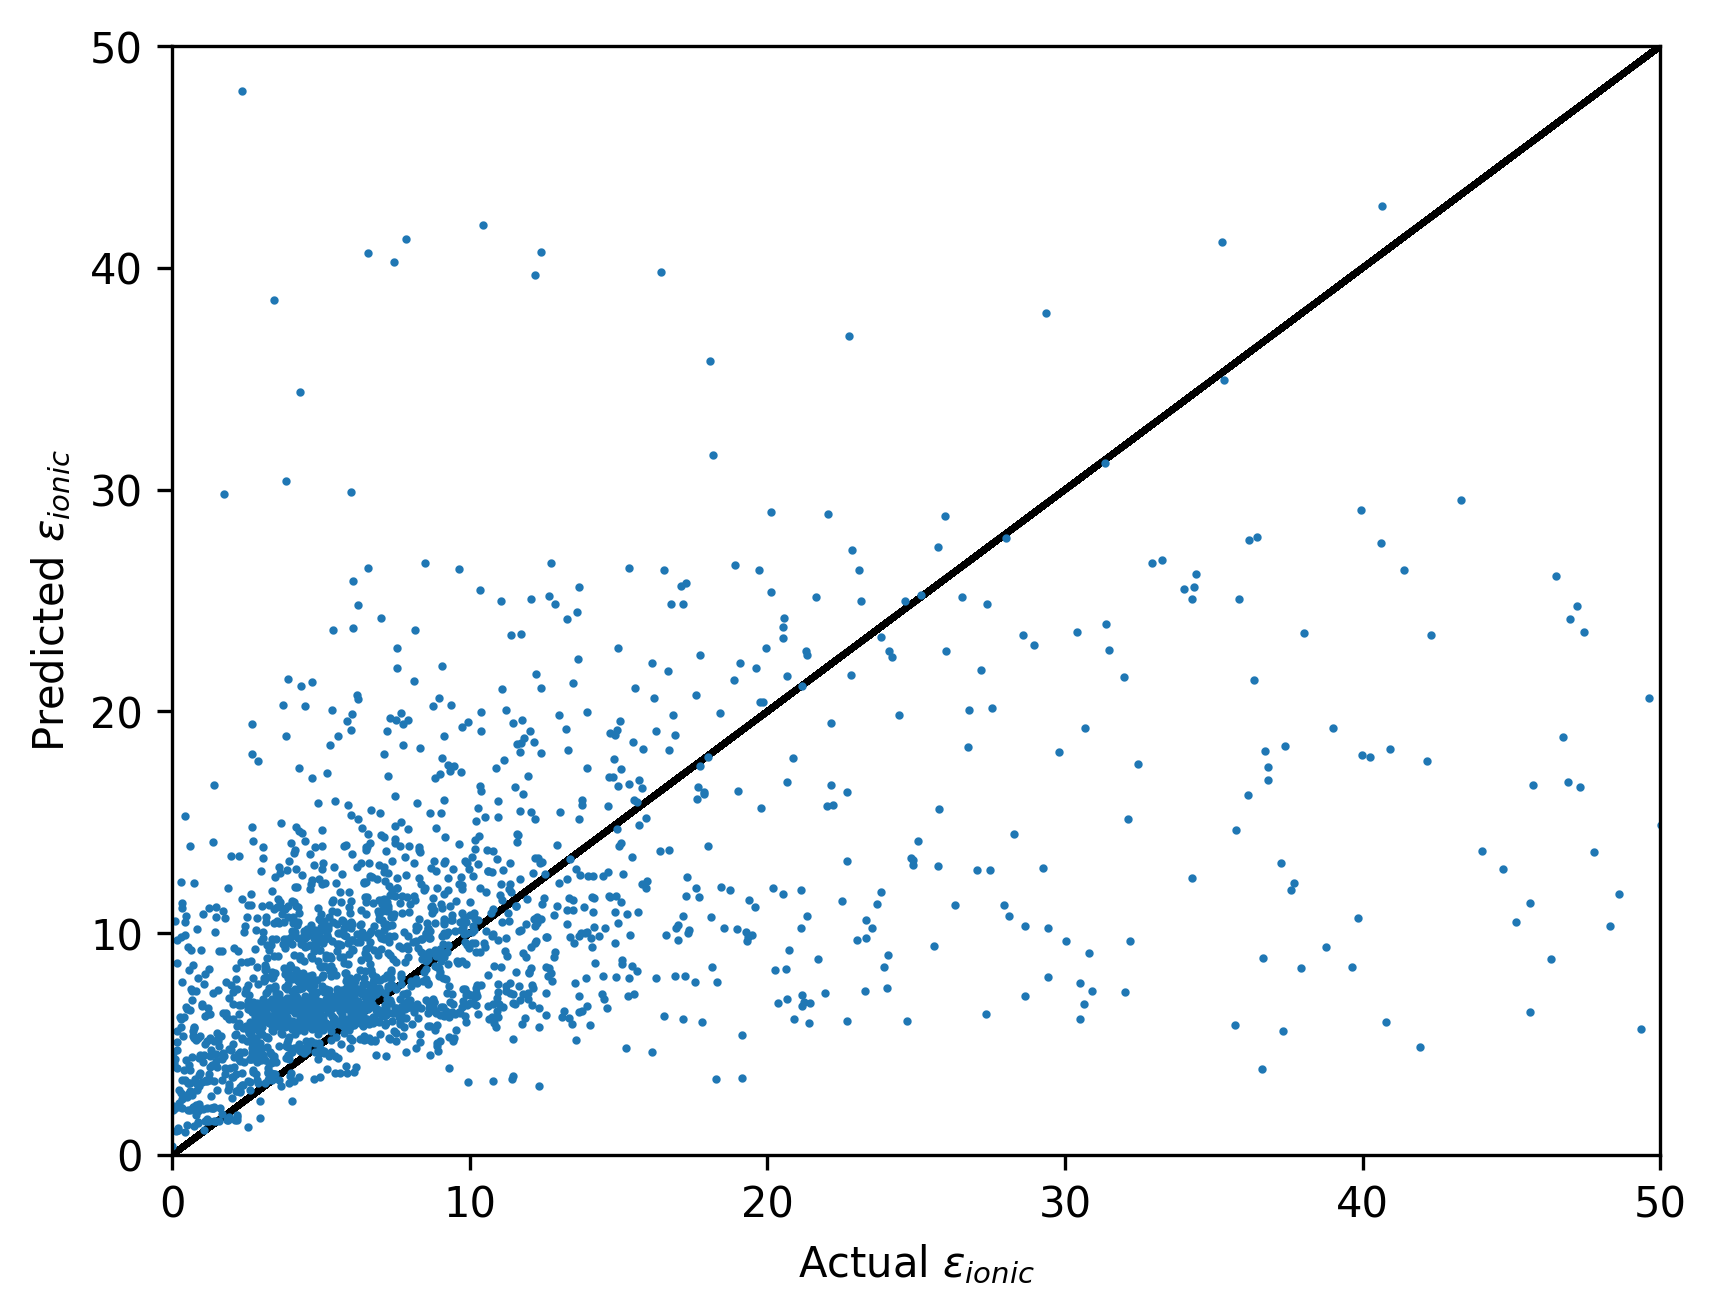

In [50]:
model_test(X_test, rf_models, rf_scalers);

## 保存随机森林算法的预测值

MSE: 161.5967540195849, MAE: 6.278931501712766


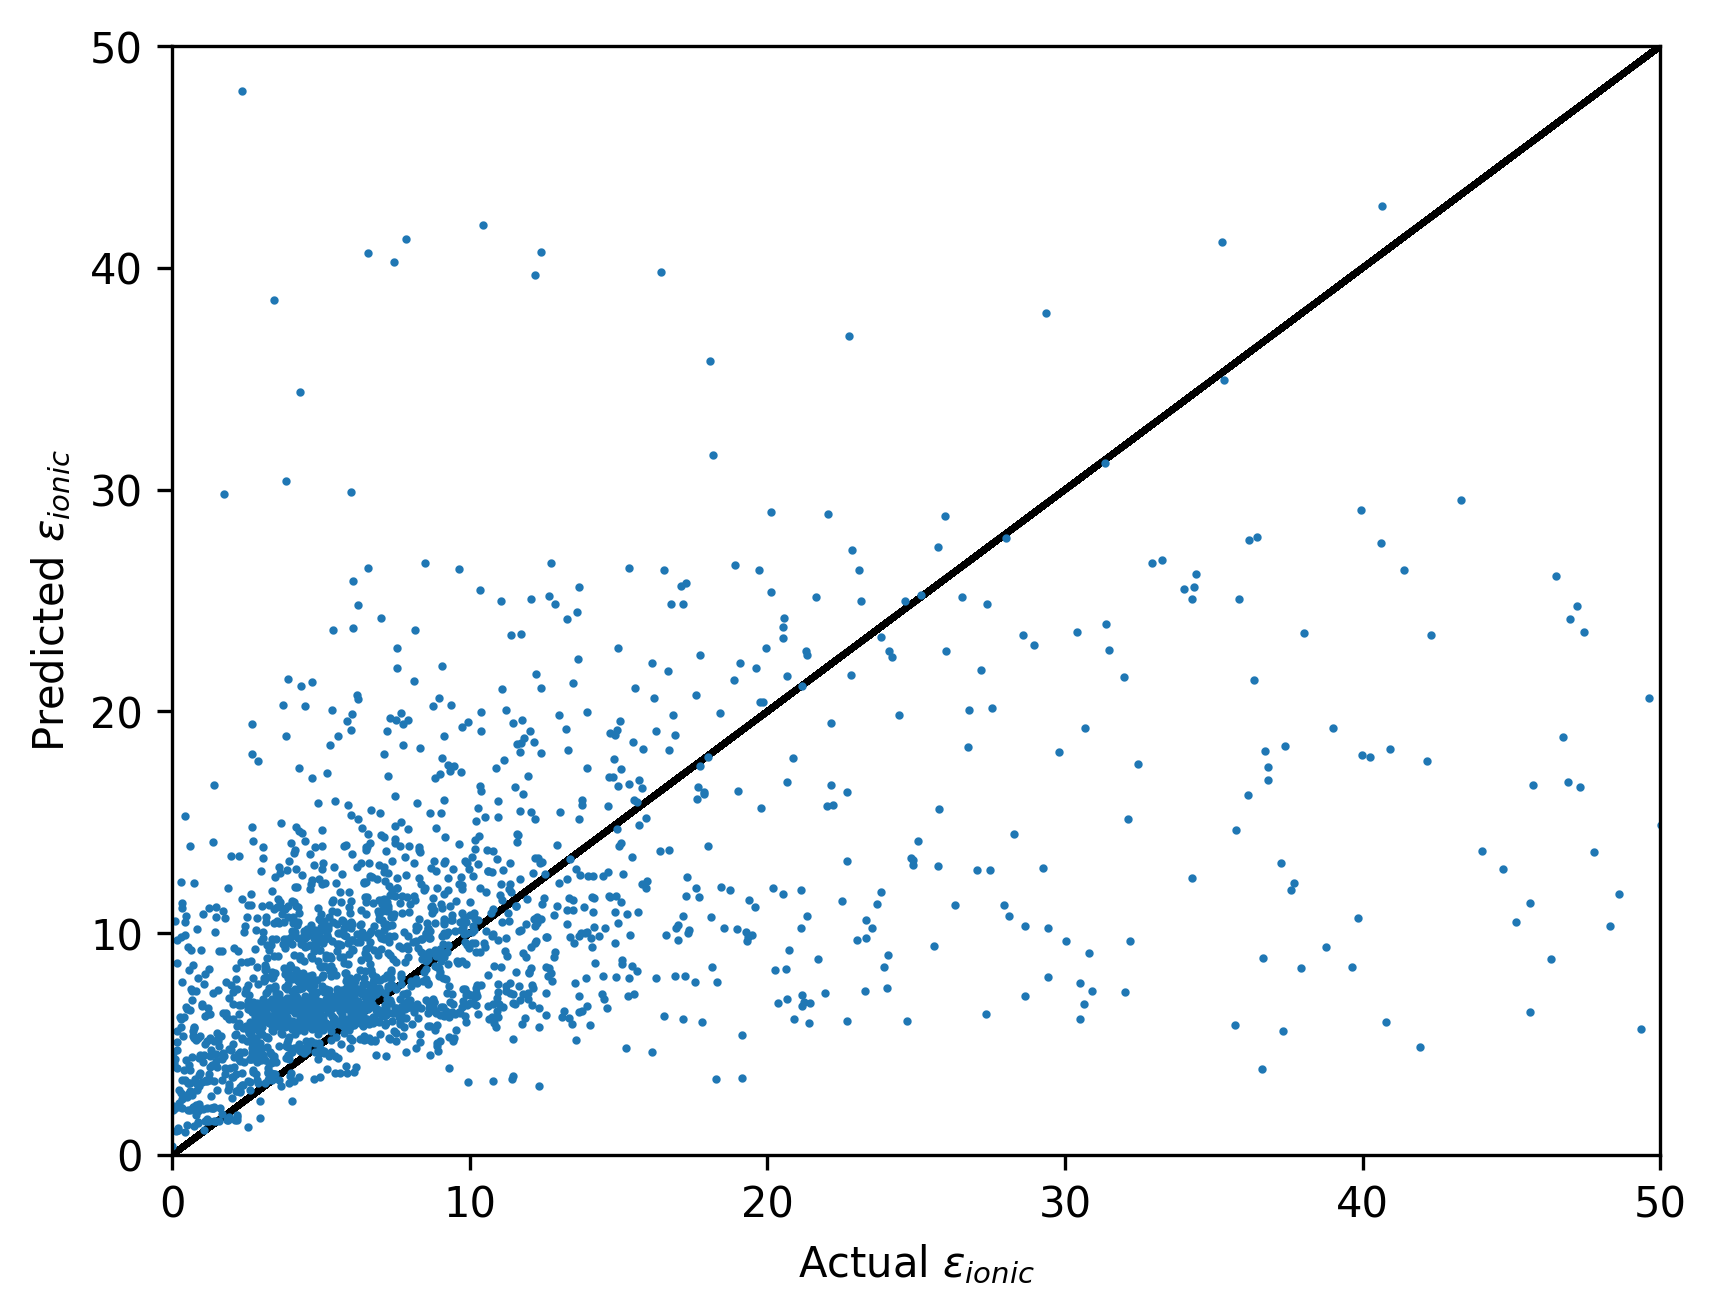

In [51]:
_, _, X_test_rf = model_test(X_test, rf_models, rf_scalers);
# 保存X_test_rf
X_test_rf.to_csv('../../data/groups/test_value/e_ionic_pred.csv', index=False)